<a href="https://colab.research.google.com/github/PierfrancescoElia/AICyberLabs/blob/main/Lab01/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Introduction to Deep Learning

| Member | ID |
| -- | -- |
| Alessandro Meneghini| s332228 |
| Pierfrancesco Elia | s331497 |
| Ankesh Porwal | s328746 |


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset
import time


## Task 1: Data Preprocessing

In this step, we analyze the dataset to ensure effective preprocessing and start with a clean, functional dataset. We identify NaN and Inf values, which we decide to remove. Additionally, we find certain features that are mostly zero, except for a few cases, making them irrelevant for our analysis.

Steps Performed:
- Removed duplicate entries.
- Identified and removed NaN values.
- Identified and removed Inf values.
- Data Visualization
- Evaluated features with minimal variation and removed those deemed irrelevant.
- Dataset splitting
- Standardization


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# import the dataset
dataset_url = 'https://raw.githubusercontent.com/PierfrancescoElia/AICyberLabs/refs/heads/main/Lab01/dataset_lab_1.csv'
df = pd.read_csv(dataset_url)

df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


20 columns of DoS Hulk are empty, we will drop them


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

#check NaN value to decide if delete them or maybe popolate with zero
display(df[df.isna().any(axis=1)])
# Remove rows with nan value
df = df.dropna()

# check inf values
display(df[df.isin([np.inf,-np.inf]).any(axis=1)])
# Remove rows with inf
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
2130,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,52606,Benign
16361,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,19152,Benign
20043,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,80,DoS Hulk


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
6683,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64231,Benign
9265,0,0.0,1,0.0,0,inf,0,1,7.0,0.0,9.333333,14,2,inf,2,47542,Benign
10138,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,17774,Benign
11793,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,21,Benign
14833,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64299,Benign
15627,0,0.0,0,6.0,6,inf,1,0,6.0,0.0,6.000000,6,1,inf,1,443,Benign
29324,0,0.0,0,6.0,6,inf,1,0,0.0,0.0,2.000000,0,1,inf,1,1026,PortScan


### Data Visualization

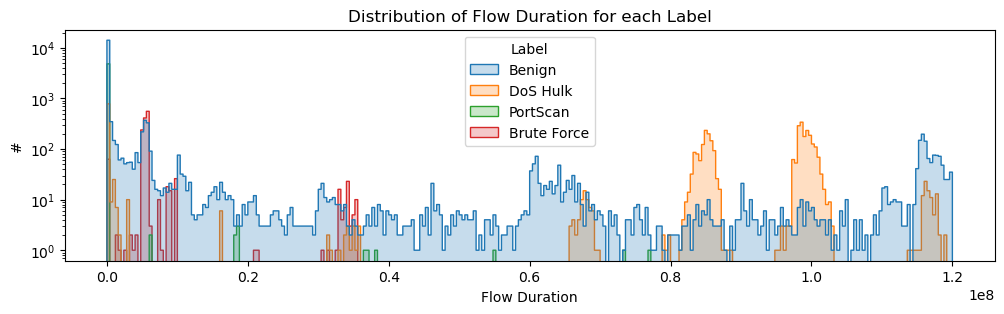

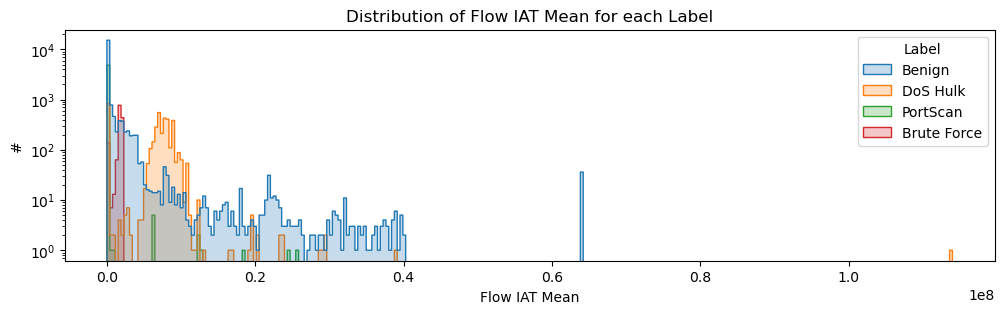

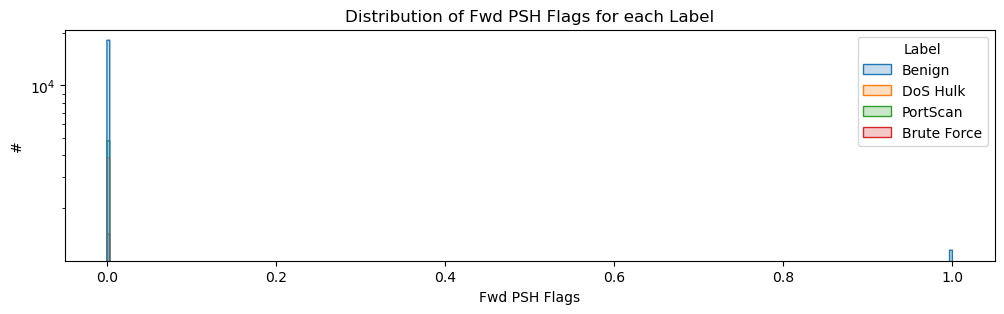

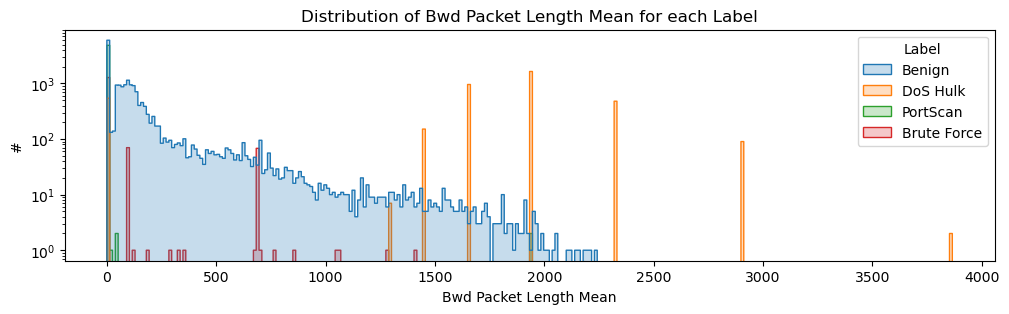

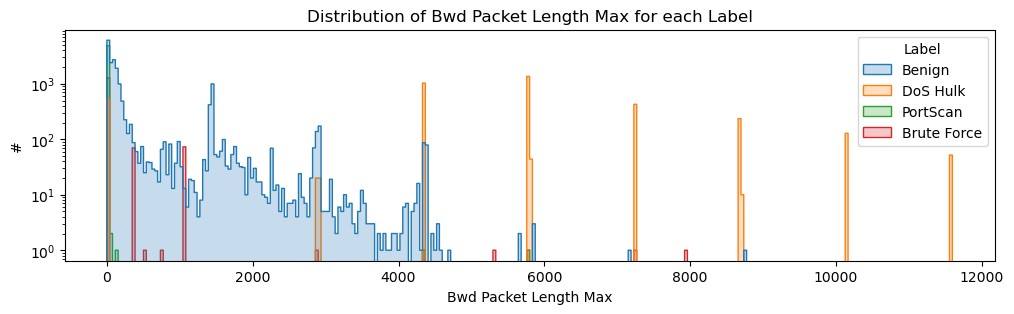

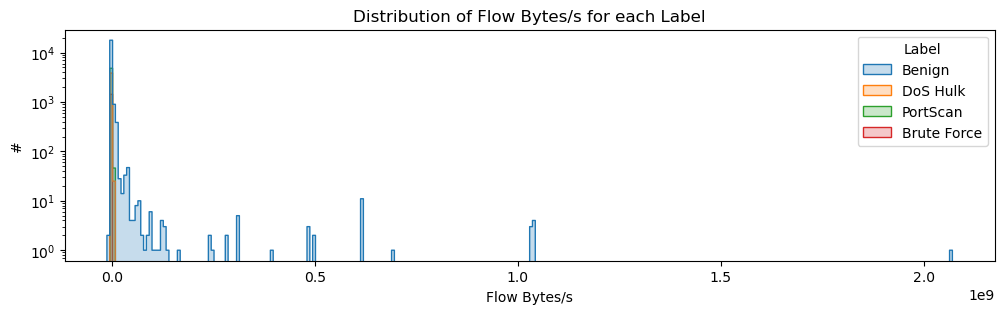

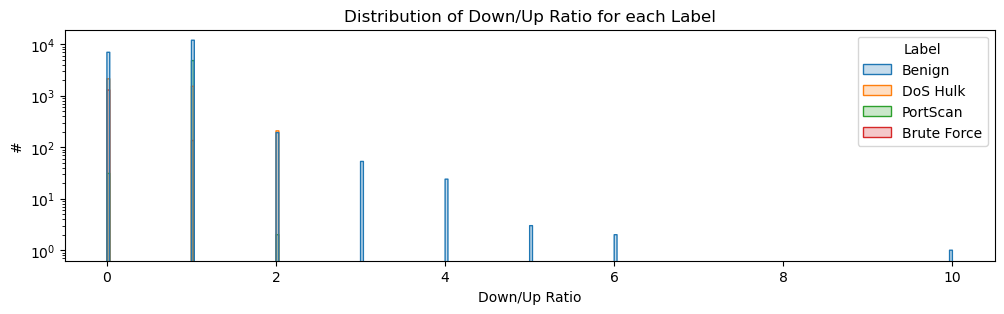

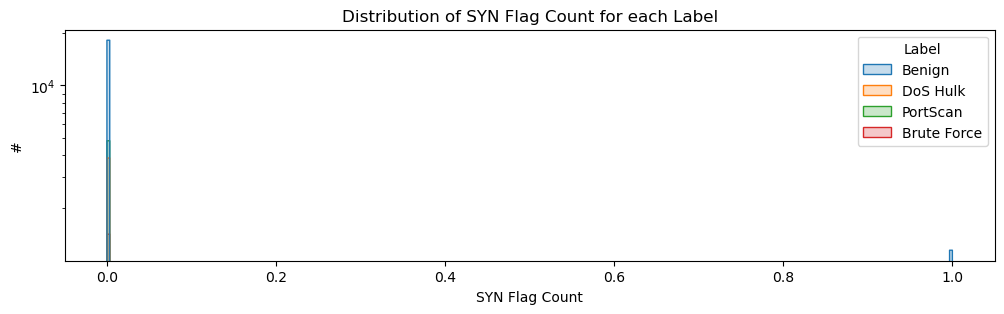

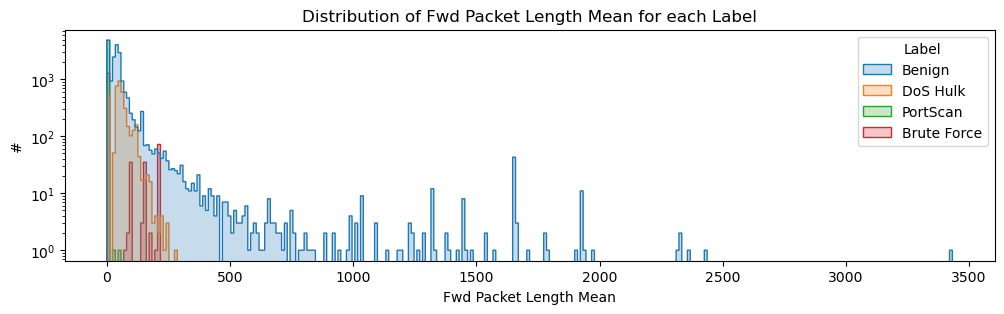

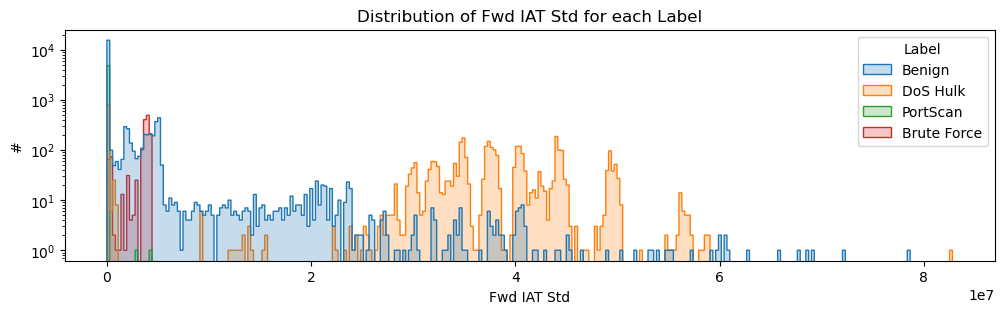

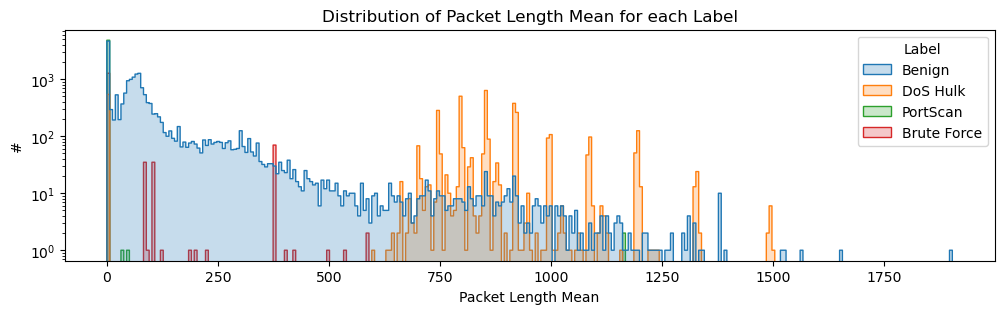

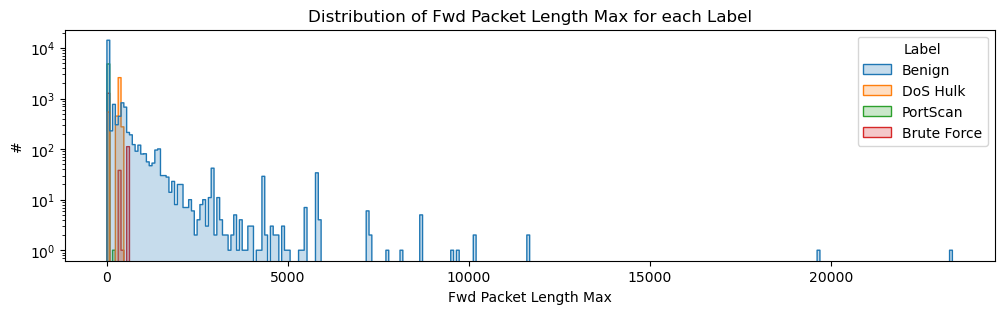

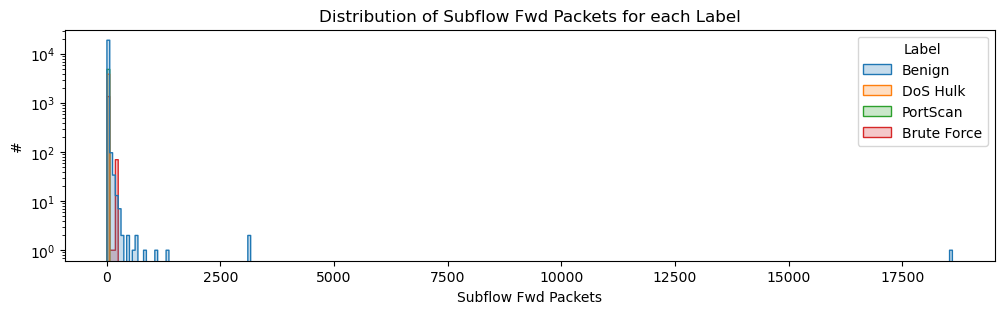

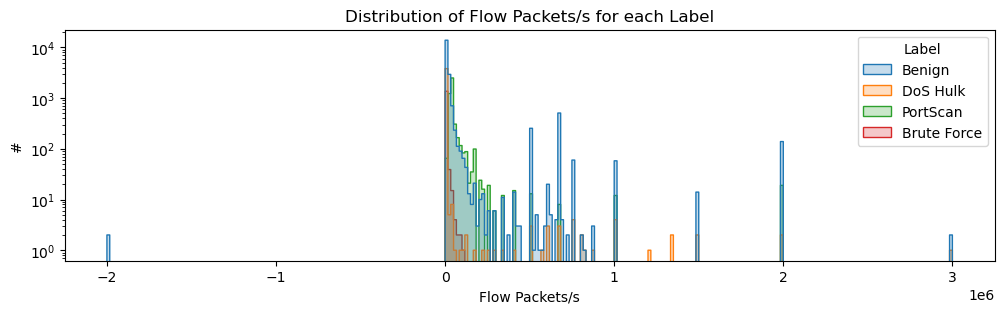

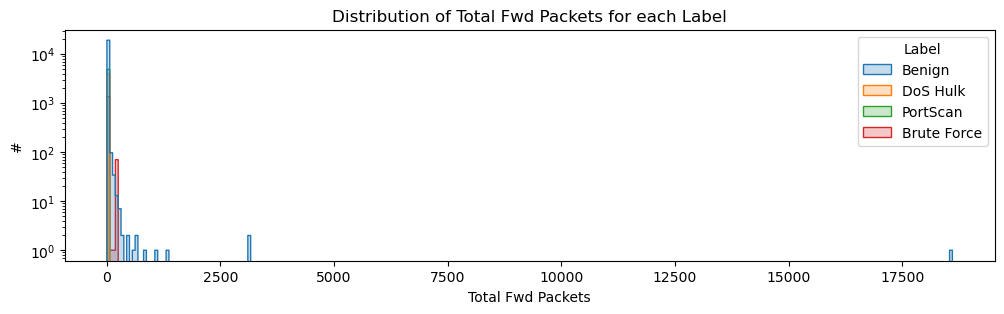

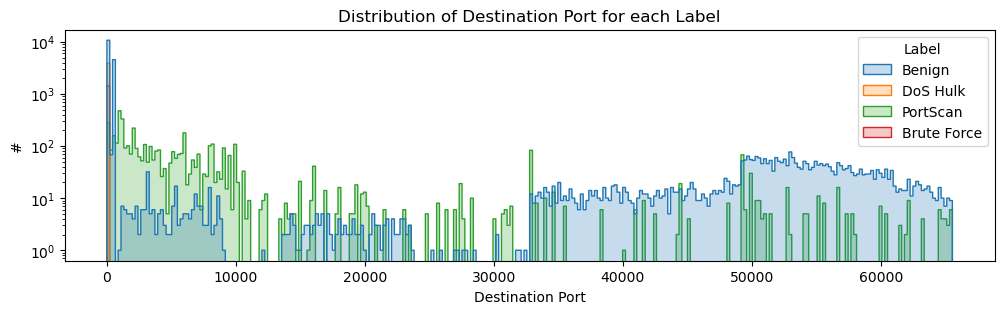

In [ ]:
label_column = df.columns[-1]  # Get the last column (assumed to be categorical labels)

# Ensure the label column is categorical for proper hue handling
df[label_column] = df[label_column].astype(str)  # Convert to string to prevent issues

for column in df.columns[:-1]:  # Iterate over all columns except the last one
    plt.figure(figsize=(12, 3))
    ax = sns.histplot(
        data=df,
        x=column,
        hue=label_column,  # Dynamically set the hue based on last column
        element="step",
        common_norm=False,
        multiple="layer",
        bins=300,
        legend=True
    )

    # Manually fetch the legend handles and labels
    handles, labels = ax.get_legend_handles_labels()

    if labels:  # Only add legend if labels exist
        plt.legend(handles=handles, labels=labels, title=label_column)

    plt.yscale("log")
    plt.title(f'Distribution of {column} for each {label_column}')
    plt.xlabel(column)
    plt.ylabel('#')
    plt.show()

We see when features `Fwd PSH Flags` and `SYN Flag Count` are `1`, the row is always labeled as Bening, these are not features that are usefull to classify attacks and for this reason they are dropped.

In [ ]:
df.drop('SYN Flag Count', axis=1, inplace=True)
df.drop('Fwd PSH Flags', axis=1, inplace=True)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
labels = df['Label']
df['Label'] = label_encoder.fit_transform(labels)

label_mapping = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
print(label_mapping)


{'Benign': 0, 'Brute Force': 1, 'DoS Hulk': 2, 'PortScan': 3}


### Dataset Splitting

   - **Training Set** → 60%
   - **Validation Set** → 20%
   - **Test Set** → 20%

In [ ]:
X = df[df.columns[:-1]].values
y = df['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (17631, 14)
Validation set: (5877, 14)
Test set: (5878, 14)


### Standardization

#### How do you preprocess the data? Is the preprocessing the same as for the training partition?

When preprocessing the test partition of a dataset, the steps should generally align with the preprocessing applied to the training partition to ensure consistency. However, the test partition should not influence the preprocessing parameters determined during the training stage (e.g., mean, standard deviation, or min/max values). For this reason we `.fit_transform()` only on the `X_Train` set and apply the scaler with `transfomr()` on `X_val` and `X_test`



### Standardization
We standardize the dataset to avoid that some features dominate on the others. Standardizing the features ensures that all input variables have a mean of 0 and a standard deviation of 1, which improves model convergence and prevents certain features from dominating due to scale differences.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Task 2: Shallow Neural Network

| **Hyperparameter**         | **Value**                                      |
|----------------------------|-----------------------------------------------|
| Layers                     | 1                                             |
| Neurons per Layer          | {32, 64, 128}                                 |
| Activation                 | Linear                                        |
| Weight Initialization      | Default                                       |
| Batch Size                 | 64                                            |
| Loss Function              | Cross-Entropy                                 |
| Optimizer                  | AdamW                                         |
| Learning Rate              | 0.0005                                        |
| Epochs & Early Stopping    | 100 or shorter based on the designed criteria |
| Regularization             | None                                          |

Answer the following questions.

- Describe how you carried out the training process.
- How does the loss curve evolve during training on the training and validation set?
- How do you select the best model across epochs? Which model do you use for validation
and test?
- What is the overall classification performance in the validation and test datasets and
considering the different classes? Indicate the results.
- Why is the performance of the model so poor?

Change the model with the best performance (optimal number of neurons) by changing the
activation function in ReLU and evaluate the effects.

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class SingleLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  # Single layer with 64 neurons

    def forward(self, x):
        return self.linear(x)  # Linear activation (default)

In [ ]:
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))
model = SingleLayerNN(input_size, output_size)

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)


In [ ]:
# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Training loop with early stopping
def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch, patience):
    num_epochs = num_epoch
    patience = patience  # Early stopping patience
    best_model_state_dict = model.state_dict()
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Load the best model state before returning
    model.load_state_dict(best_model_state_dict)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    # plt.yscale('log')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses



In [ ]:
def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy, all_labels, all_predictions

Epoch 10/100, Train Loss: 0.6056, Val Loss: 0.5814
Epoch 20/100, Train Loss: 0.4871, Val Loss: 0.4670
Epoch 30/100, Train Loss: 0.4404, Val Loss: 0.4193
Epoch 40/100, Train Loss: 0.4154, Val Loss: 0.3937
Epoch 50/100, Train Loss: 0.4001, Val Loss: 0.3778
Epoch 60/100, Train Loss: 0.3900, Val Loss: 0.3672
Epoch 70/100, Train Loss: 0.3822, Val Loss: 0.3595
Epoch 80/100, Train Loss: 0.3768, Val Loss: 0.3536
Epoch 90/100, Train Loss: 0.3722, Val Loss: 0.3490
Epoch 100/100, Train Loss: 0.3686, Val Loss: 0.3452
Training completed in 21.02 seconds.


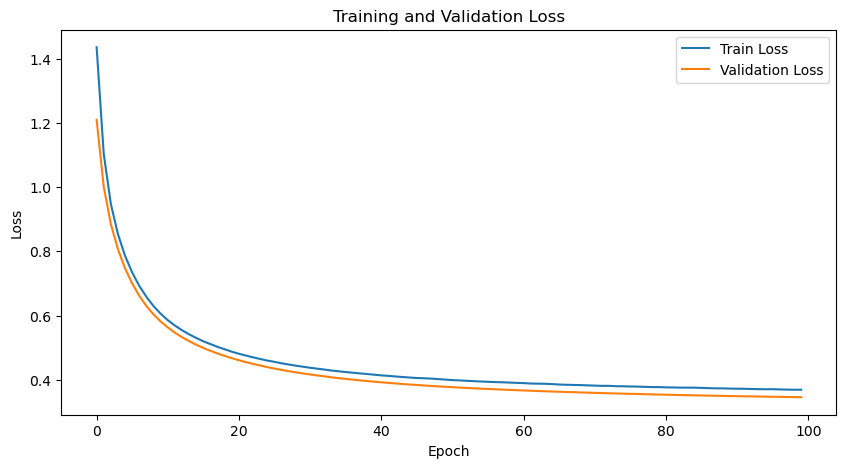

In [ ]:
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 100, patience = 20)

In [ ]:
# 2. Then evaluate the trained model
train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

# 3. Finally print the results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Train report")
print(classification_report(train_labels, train_preds))
print("Val report")
print(classification_report(val_labels, val_preds))
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.1144 seconds to execute.
The function took 0.0320 seconds to execute.
The function took 0.0317 seconds to execute.
Train Accuracy: 87.8112
Validation Accuracy: 88.2083
Test Accuracy: 88.7207
Train report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11515
           1       0.00      0.00      0.00       866
           2       0.97      0.84      0.90      2292
           3       0.81      0.88      0.84      2958

    accuracy                           0.88     17631
   macro avg       0.67      0.67      0.67     17631
weighted avg       0.84      0.88      0.86     17631

Val report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3900
           1       0.00      0.00      0.00       286
           2       0.98      0.86      0.92       776
           3       0.81      0.88      0.84       915

    accuracy                           0.88      5877
   m

#### Description of the training process

The model was trained using a single-layer neural network (SingleLayerNN) implemented in PyTorch. The data was loaded into mini-batches of size 64 using DataLoader. The loss function used was cross-entropy, and the optimizer was AdamW with a learning rate of 0.0005. Early stopping was implemented with a patience of 10 epochs, and the model with the lowest validation loss was saved and restored.

- How does the loss curve evolve during training on the training and validation set?

During training, both the training and validation loss generally decreased over epochs, but the improvement plateaued after a certain point. The model stopped training early based on the early stopping criterion to avoid overfitting. A plot of training and validation loss was shown to visualize the evolution of losses across epochs.

- How do you select the best model across epochs? Which model do you use for validation and test?

The best model was selected using early stopping, by monitoring the validation loss after each epoch. The model state (weights) corresponding to the lowest validation loss was saved. This best-performing model was then used for both validation and test evaluations.

- What is the overall classification performance in the validation and test datasets and considering the different classes? Indicate the results.

See the Train Accuracy, Validation Accuracy and Test Accuracy above.For per-class performance we added precision, recall, f1-score and support report

- Why is the performance of the model so poor?

The poor performance can be attributed to:

- The use of linear activation, which limits the model's capacity to learn nonlinear patterns in the data.
- A very simple architecture (only one layer, no regularization).
- Possibly imbalanced or complex data that needs more expressive power.


### Best performance model with ReLU Activation Function

In [ ]:
class NonLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
model = NonLinearModel(14, 4)
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

Epoch 10/100, Train Loss: 0.1485, Val Loss: 0.1387
Epoch 20/100, Train Loss: 0.1260, Val Loss: 0.1212
Epoch 30/100, Train Loss: 0.1147, Val Loss: 0.1102
Epoch 40/100, Train Loss: 0.1060, Val Loss: 0.1034
Epoch 50/100, Train Loss: 0.1013, Val Loss: 0.0981
Epoch 60/100, Train Loss: 0.0973, Val Loss: 0.0947
Epoch 70/100, Train Loss: 0.0940, Val Loss: 0.1005
Epoch 80/100, Train Loss: 0.0932, Val Loss: 0.0976
Epoch 90/100, Train Loss: 0.0876, Val Loss: 0.0978
Epoch 100/100, Train Loss: 0.0841, Val Loss: 0.0898
Training completed in 50.23 seconds.


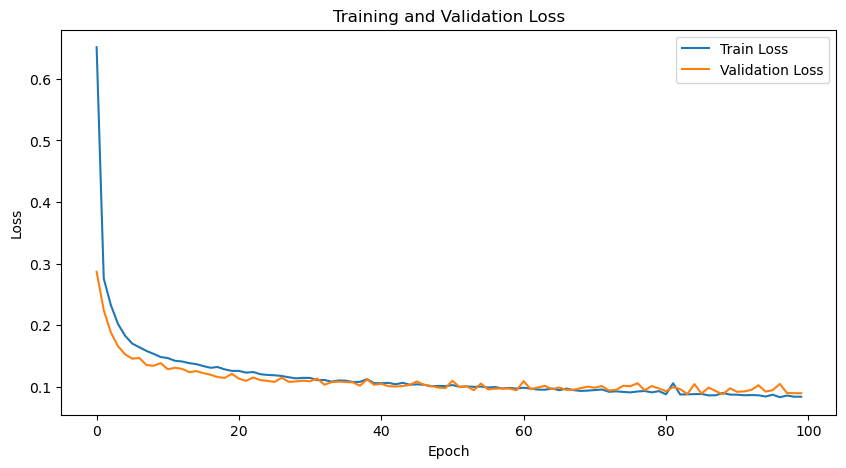

In [ ]:
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion,num_epoch = 100, patience = 20)

In [ ]:
# print(f'Learned weights: {model.fc1.weight.data}')
# print(f'Learned biases: {model.fc1.bias.data}')
# print(f'Learned weights: {model.fc2.weight.data}')
# print(f'Learned biases: {model.fc2.bias.data}')
# print(f'Learned weights: {model.fc3.weight.data}')
# print(f'Learned biases: {model.fc3.bias.data}')
# print(f'Learned weights: {model.fc4.weight.data}')
# print(f'Learned biases: {model.fc4.bias.data}')

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Train report")
print(classification_report(train_labels, train_preds))
print("Val report")
print(classification_report(val_labels, val_preds))
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.2505 seconds to execute.
The function took 0.0671 seconds to execute.
The function took 0.0706 seconds to execute.
Train Accuracy: 96.6082
Validation Accuracy: 96.7671
Test Accuracy: 97.1929
Train report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11515
           1       0.93      0.94      0.93       866
           2       0.97      0.94      0.96      2292
           3       0.96      0.92      0.94      2958

    accuracy                           0.97     17631
   macro avg       0.96      0.95      0.95     17631
weighted avg       0.97      0.97      0.97     17631

Val report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3900
           1       0.94      0.95      0.95       286
           2       0.97      0.94      0.95       776
           3       0.97      0.92      0.94       915

    accuracy                           0.97      5877
   m

## Task3: The impact of specific features

As you learned in the lecture, biases in data collection can carry over to the model and become inductive biases.  
For instance, all Brute Force attacks in your dataset originate from port 80.  

- Is this a reasonable assumption?  
-  Now replace port 80 with port 8080 for the Brute Force attacks in the test set. Use the previously trained model for inference:  
    - Does the performance change?
    - How does it change?
    - Why?

Now remove the feature **port** from the original dataset (**use this dataset from now on for the entire lab**) and repeat all preprocessing steps.  

- How many PortScan instances do you now have after preprocessing?
- How many did you have before?
- Why do you think PortScan is the most affected class after dropping duplicates?
- Are the classes now balanced?

Now repeat the training process with the best architecture found in the previous step:  
- How does the performance change?
- Can you still classify the rarest class?

To improve performance and account for class imbalance, use a *weighted loss function*. Use the `weight` parameter of `CrossEntropyLoss`, which expects a tensor of class weights. To estimate the weights, use the `compute_class_weight` function from `sklearn` and set `class_weight="balanced"`. Repeat the training process with the new loss function.  

- How does the performance change per class and overall?
- How does the accuracy change?
- How does the F1-score change?  

### Bias analysis
All Brute Force attacks form port 80 is not a reasonable assumption. In real work they can target any port, depending on the exposed service. Assuming they only come from port 80 is a form of bias: it makes the model associate "port 80" directly with "Brute Force", rather than learning the true patterns of attack behavior. This bias may cause the model to fail to generalize to attacks using other ports.

In [ ]:
# Creation of a fake sample to obtain the standardization of port 8080
sample = np.zeros((1, X_train.shape[1]))
sample[0, 13] = 8080
standardized_8080 = scaler.transform(sample)[0, 13]

In [ ]:
X_test_modified = X_test.copy()

brute_force_indices = y_test == label_mapping['Brute Force']
port_col_index = df.columns.get_loc('Destination Port')

X_test_modified[brute_force_indices, port_col_index] = standardized_8080

### Evaluation on test set with Brute Force on port 8080


In [ ]:
X_test_mod_tensor = torch.tensor(X_test_modified, dtype=torch.float32).to(device)
test_mod_dataset = TensorDataset(X_test_mod_tensor, y_test_tensor)
test_mod_loader = DataLoader(test_mod_dataset, batch_size=batch_size, shuffle=False)

test_accuracy, test_labels, test_preds = testing_model(model, test_mod_loader, device)


print(f'Test Accuracy: {test_accuracy:.4f}')
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.0619 seconds to execute.
Test Accuracy: 92.8887
Test report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3827
           1       0.45      0.05      0.09       275
           2       0.97      0.95      0.96       800
           3       0.98      0.93      0.95       976

    accuracy                           0.93      5878
   macro avg       0.83      0.73      0.74      5878
weighted avg       0.91      0.93      0.91      5878



#### Label 1 (Brute Force) Analysis
- Precision → it don’t even predict Brute Force for anything.
- Recall → the model don’t correctly classify any Brute Force samples.
- F1-score → no balance between precision/recall because both are zero.

This means the model can't classify correctly the Brute Force's datapoint.

### Preprocessing w/o 'Destination Port' feature

In [ ]:
df2 = pd.read_csv(dataset_url)
df2.drop(['SYN Flag Count','Fwd PSH Flags','Destination Port'], axis=1, inplace=True)
df2.drop_duplicates(inplace=True)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)
df2

,Flow Duration,Flow IAT Mean,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Label
0,303376,3.033760e+04,749.4,1448,12743.263,0,19.833334,98776.15,322.16666,119,6,36.258636,6,Benign
1,117,1.170000e+02,0.0,0,0.000,1,0.000000,0.00,0.00000,0,1,17094.018000,1,Benign
2,142,1.420000e+02,0.0,0,84507.040,0,6.000000,0.00,6.00000,6,2,14084.507000,2,Benign
3,191,6.366667e+01,52.0,52,921465.940,1,36.000000,0.00,42.40000,36,2,20942.408000,2,Benign
4,4,4.000000e+00,0.0,0,3000000.000,0,6.000000,0.00,6.00000,6,2,500000.000000,2,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0.0,0,0.000,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,Brute Force
31503,5862561,1.954187e+06,0.0,0,0.000,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,Brute Force
31504,5854872,1.951624e+06,0.0,0,0.000,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,Brute Force
31505,5555547,1.851849e+06,0.0,0,0.000,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,Brute Force


#### PortScan instances

In [ ]:
cardinality_portscan_df = labels.value_counts().get('PortScan', 0)
cardinality_portscan_df2 = df2['Label'].value_counts().get('PortScan', 0)

print("PortScan datapoint before bias analysis: # " + str(cardinality_portscan_df))
print("PortScan datapoint after bias analysis: # " + str(cardinality_portscan_df2))

PortScan datapoint before bias analysis: # 4849
PortScan datapoint after bias analysis: # 285


A lot of `PortScan` datapoints are being dropped because the only differing feature is the Destination Port

#### Class balance
The dataset remains imbalanced also after bias analysis, with the `Benign` class still significantly outweighing the `PortScan` class, which has been drastically reduced.

In [ ]:
class_balance_old = labels.value_counts()
print("Class balance before Bias Analysis")
print(class_balance_old)

print("Class balance after Bias Analysis")
class_balance = df2['Label'].value_counts()
print(class_balance)

Class balance before Bias Analysis
Label
Benign         19242
PortScan        4849
DoS Hulk        3868
Brute Force     1427
Name: count, dtype: int64
Class balance after Bias Analysis
Label
Benign         16889
DoS Hulk        3868
Brute Force     1427
PortScan         285
Name: count, dtype: int64


### New training with the latest architecture found in the previous step


In [ ]:
df2 = df2.reset_index(drop=True)
X = df2[df2.columns[:-1]].values

labels2 = df2['Label']
df2['Label'] = label_encoder.transform(labels2)
y = df2['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

Training set: (13481, 13)
Validation set: (4494, 13)
Test set: (4494, 13)


In [ ]:
# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch 10/100, Train Loss: 0.1380, Val Loss: 0.1375
Epoch 20/100, Train Loss: 0.1188, Val Loss: 0.1216
Epoch 30/100, Train Loss: 0.1081, Val Loss: 0.1090
Epoch 40/100, Train Loss: 0.1005, Val Loss: 0.1078
Epoch 50/100, Train Loss: 0.0947, Val Loss: 0.0974
Epoch 60/100, Train Loss: 0.0917, Val Loss: 0.0965
Epoch 70/100, Train Loss: 0.0889, Val Loss: 0.0962
Epoch 80/100, Train Loss: 0.0869, Val Loss: 0.0956
Epoch 90/100, Train Loss: 0.0840, Val Loss: 0.0913
Early stopping triggered.
Training completed in 47.14 seconds.


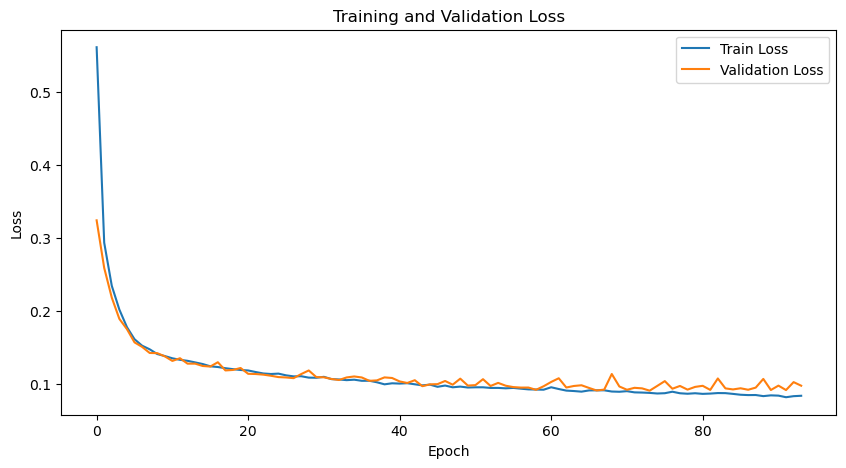

In [ ]:
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))

model = NonLinearModel(input_size, output_size)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 100, patience = 20)

In [ ]:
train_accuracy_noport, train_labels_noport, train_preds_noport = testing_model(model, train_loader, device)
val_accuracy_noport, val_labels_noport, val_preds_noport = testing_model(model, val_loader, device)
test_accuracy_noport, test_labels_noport, test_preds_noport = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy_noport:.4f}')
print(f'Validation Accuracy: {val_accuracy_noport:.4f}')
print(f'Test Accuracy: {test_accuracy_noport:.4f}')

print("Train report")
print(classification_report(train_labels_noport, train_preds_noport))
print("Val report")
print(classification_report(val_labels_noport, val_preds_noport))
print("Test report")
print(classification_report(test_labels_noport, test_preds_noport))

The function took 0.3133 seconds to execute.
The function took 0.0344 seconds to execute.
The function took 0.0340 seconds to execute.
Train Accuracy: 96.5655
Validation Accuracy: 96.4842
Test Accuracy: 96.4174
Train report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     10133
           1       0.94      0.94      0.94       855
           2       0.98      0.92      0.95      2318
           3       0.49      0.57      0.53       175

    accuracy                           0.97     13481
   macro avg       0.84      0.86      0.85     13481
weighted avg       0.97      0.97      0.97     13481

Val report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3377
           1       0.94      0.92      0.93       273
           2       0.98      0.91      0.95       786
           3       0.52      0.59      0.55        58

    accuracy                           0.96      4494
   m

While the overall accuracy metrics of the model still look good, the performance for the rare class PortScan has significantly decreased in the new model. The model is struggling to identify this rare class effectively, especially when compared to the previous model.
- Recall and F1-scores for PortScan have dropped, meaning the model is missing many instances of this rare class.
- The model can classify PortScan with significantly reduced performance.

### Weighted loss function

Epoch 10/100, Train Loss: 0.2369, Val Loss: 0.2529
Epoch 20/100, Train Loss: 0.2029, Val Loss: 0.2462
Epoch 30/100, Train Loss: 0.1888, Val Loss: 0.2277
Epoch 40/100, Train Loss: 0.1771, Val Loss: 0.2234
Epoch 50/100, Train Loss: 0.1726, Val Loss: 0.2290
Epoch 60/100, Train Loss: 0.1646, Val Loss: 0.2276
Epoch 70/100, Train Loss: 0.1608, Val Loss: 0.2227
Epoch 80/100, Train Loss: 0.1533, Val Loss: 0.2330
Epoch 90/100, Train Loss: 0.1476, Val Loss: 0.2181
Early stopping triggered.
Training completed in 35.69 seconds.


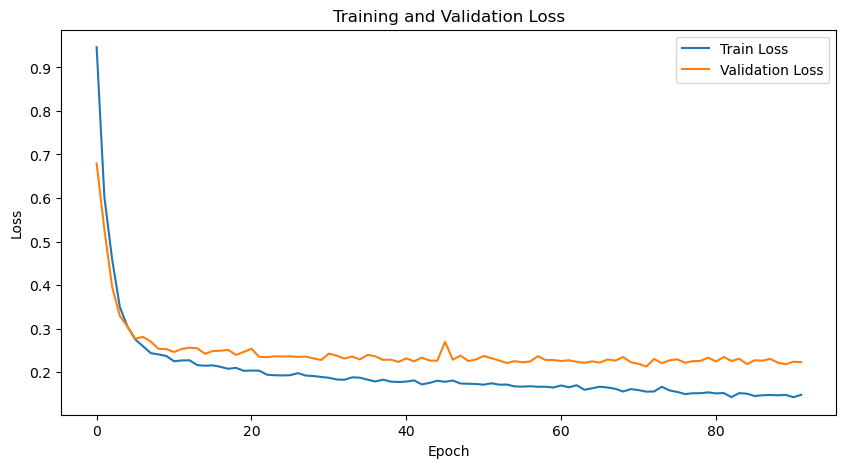

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

model = NonLinearModel(input_size, output_size)
model = model.to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 100, patience = 20)

In [ ]:
train_accuracy_noport_weights, train_labels_noport_weights, train_preds_noport_weights = testing_model(model, train_loader, device)
val_accuracy_noport_weights, val_labels_noport_weights, val_preds_noport_weights = testing_model(model, val_loader, device)
test_accuracy_noport_weights, test_labels_noport_weights, test_preds_noport_weights = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy_noport_weights:.4f}')
print(f'Validation Accuracy: {val_accuracy_noport_weights:.4f}')
print(f'Test Accuracy: {test_accuracy_noport_weights:.4f}')

print("Train report")
print(classification_report(train_labels_noport_weights, train_preds_noport_weights))
print("Val report")
print(classification_report(val_labels_noport_weights, val_preds_noport_weights))
print("Test report")
print(classification_report(test_labels_noport_weights, test_preds_noport_weights))

The function took 0.1452 seconds to execute.
The function took 0.0461 seconds to execute.
The function took 0.0462 seconds to execute.
Train Accuracy: 93.4055
Validation Accuracy: 93.4802
Test Accuracy: 92.9907
Train report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10133
           1       0.85      0.96      0.90       855
           2       0.89      0.93      0.91      2318
           3       0.29      0.98      0.45       175

    accuracy                           0.93     13481
   macro avg       0.76      0.95      0.81     13481
weighted avg       0.96      0.93      0.94     13481

Val report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3377
           1       0.83      0.93      0.87       273
           2       0.89      0.93      0.91       786
           3       0.30      0.97      0.46        58

    accuracy                           0.93      4494
   m

The drastic drop in precision for class 3 when we introduce class weights is likely due to the model becoming too focused on this class during training, which leads to an increase in false positives.
Precision Definition:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$


So, when the model starts predicting class 3 more often (due to the increased weight), the False Positives for class 3 increase, which leads to a drop in precision.

**Performance per Class**: The performance across different classes changes when class weights are introduced. For some classes, such as class 3, precision decreases significantly, which means the model is now classifying many instances as class 3 incorrectly (false positives). For other classes, like class 0, while the recall remains high, the precision drops slightly, indicating the model is misclassifying some instances of other classes as class 0. The F1-score for class 3 decreases as well, showing a negative impact on both precision and recall. Overall, the rare class (class 3) gets more attention but with less precision, and the balance of performance between classes is affected.

**Accuracy**: Accuracy decreases significantly when class weights are applied. The model’s overall accuracy drops from approximately 97% to 90%. This indicates that while the model improves its ability to predict the rare class (class 3) by focusing on it more, this comes at the cost of performance on other classes, leading to a decrease in overall correct predictions.

**F1-score**: The F1-score, which balances precision and recall, also decreases across the board when class weights are applied. The F1-score for the rare class (class 3) drops significantly, mainly due to the large increase in false positives. While recall for class 3 increases, precision for class 3 suffers, causing the F1-score to decrease. The overall F1-score drops as well, indicating that the model's balance between precision and recall has been disrupted, and it is performing less effectively overall.

In short, while the class weights help improve recall for the minority class, they also lead to a higher number of false positives, hurting precision and the overall F1-score, as well as reducing the model's overall accuracy.

## Task 4: Deep Neural Network


### Different Layer architectures

| **Hyperparameter**         | **Value**                      |
|----------------------------|--------------------------------|
| Layers                     | 2 to 5                         |
| Neurons per Layer          | {2, 4, 8, 16, 32}              |
| Activation                 | ReLU                           |
| Weight Initialization      | Default                        |
| Batch Size                 | 128                            |
| Loss Function              | Cross-Entropy                  |
| Optimizer                  | AdamW                          |
| Learning Rate              | 0.0005                         |
| Epochs & Early Stopping    | 50 or shorter based on the designed criteria |
| Regularization             | None                           |

Compare different architectures and:
- Identify the best-performing architecture.
- Plot and analyze the losses.
- Evaluate the performance of the validation and test set.


Training with: [16, 8]
Epoch 10/50, Train Loss: 0.2610, Val Loss: 0.2580
Epoch 20/50, Train Loss: 0.1870, Val Loss: 0.1869
Epoch 30/50, Train Loss: 0.1569, Val Loss: 0.1579
Epoch 40/50, Train Loss: 0.1427, Val Loss: 0.1446
Epoch 50/50, Train Loss: 0.1344, Val Loss: 0.1380
Training completed in 11.51 seconds.


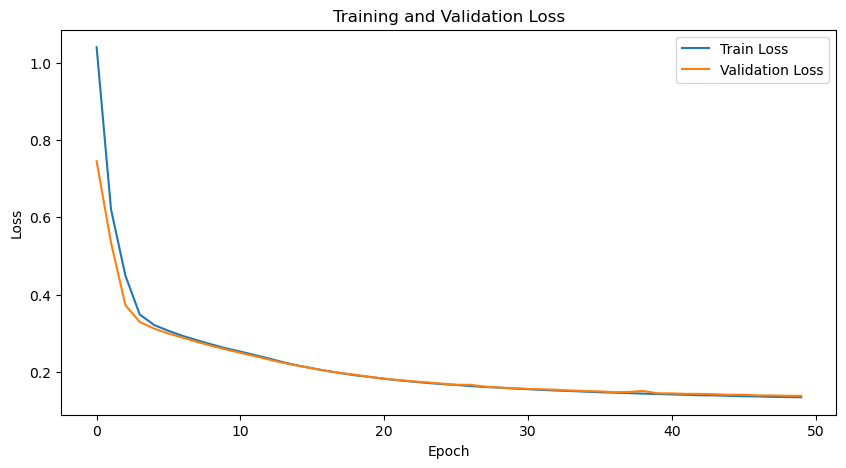

The function took 0.1066 seconds to execute.
The function took 0.0393 seconds to execute.
The function took 0.0289 seconds to execute.
Train Accuracy: 94.6666
Validation Accuracy: 94.5260
Test Accuracy: 94.2368

Training with: [32, 16]
Epoch 10/50, Train Loss: 0.2089, Val Loss: 0.2046
Epoch 20/50, Train Loss: 0.1586, Val Loss: 0.1577
Epoch 30/50, Train Loss: 0.1421, Val Loss: 0.1410
Epoch 40/50, Train Loss: 0.1334, Val Loss: 0.1331
Epoch 50/50, Train Loss: 0.1268, Val Loss: 0.1281
Training completed in 11.64 seconds.


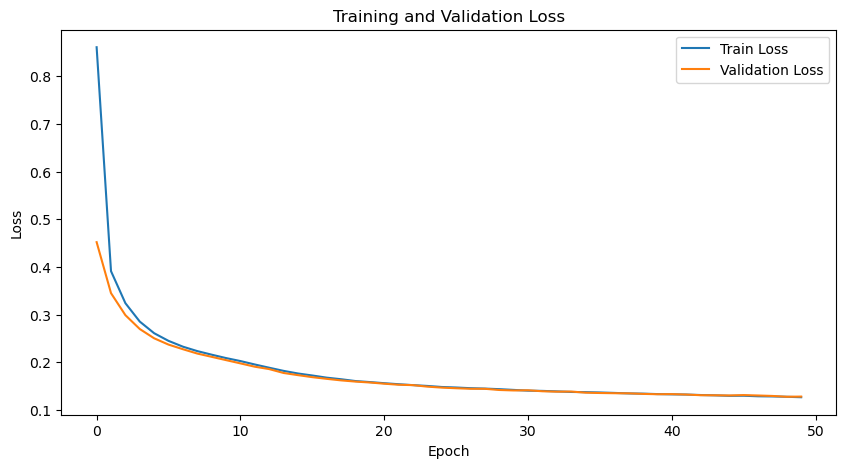

The function took 0.1475 seconds to execute.
The function took 0.0314 seconds to execute.
The function took 0.0296 seconds to execute.
Train Accuracy: 94.9039
Validation Accuracy: 94.7486
Test Accuracy: 94.5483

Training with: [32, 16, 8]
Epoch 10/50, Train Loss: 0.2223, Val Loss: 0.2118
Epoch 20/50, Train Loss: 0.1454, Val Loss: 0.1472
Epoch 30/50, Train Loss: 0.1319, Val Loss: 0.1347
Epoch 40/50, Train Loss: 0.1237, Val Loss: 0.1275
Epoch 50/50, Train Loss: 0.1168, Val Loss: 0.1211
Training completed in 13.56 seconds.


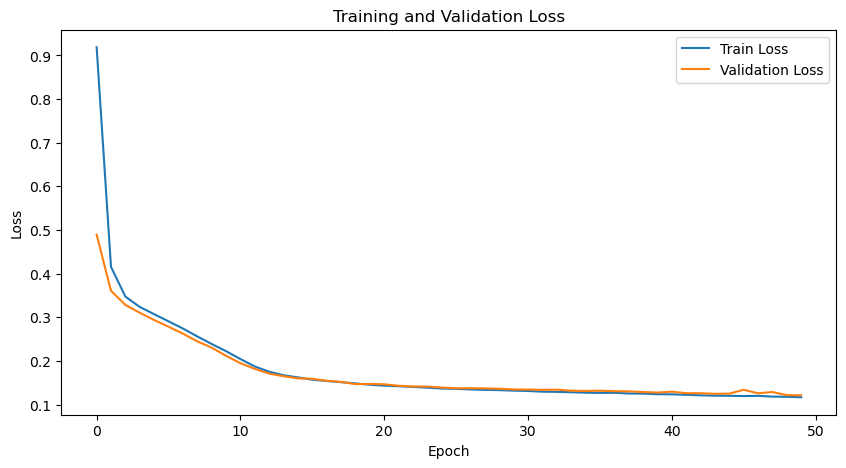

The function took 0.0978 seconds to execute.
The function took 0.0352 seconds to execute.
The function took 0.0533 seconds to execute.
Train Accuracy: 96.0760
Validation Accuracy: 95.9724
Test Accuracy: 96.0837

Training with: [32, 16, 8, 4]
Epoch 10/50, Train Loss: 0.2348, Val Loss: 0.2233
Epoch 20/50, Train Loss: 0.1480, Val Loss: 0.1496
Epoch 30/50, Train Loss: 0.1320, Val Loss: 0.1335
Epoch 40/50, Train Loss: 0.1219, Val Loss: 0.1214
Epoch 50/50, Train Loss: 0.1127, Val Loss: 0.1213
Training completed in 15.13 seconds.


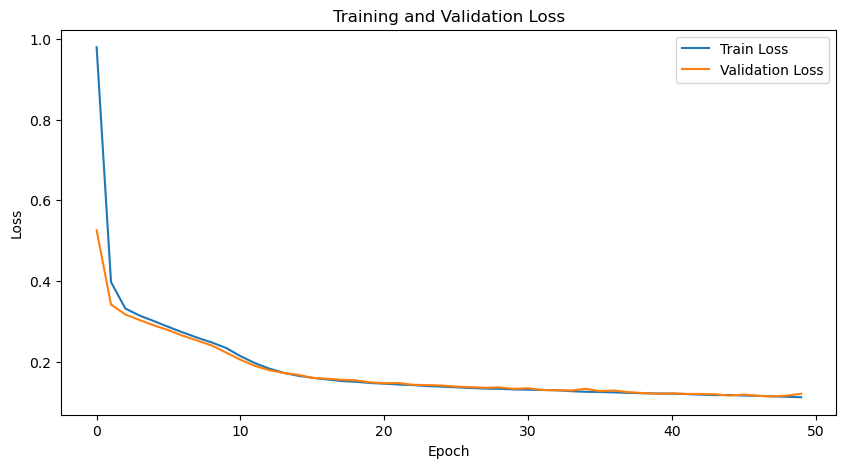

The function took 0.1054 seconds to execute.
The function took 0.0409 seconds to execute.
The function took 0.0341 seconds to execute.
Train Accuracy: 95.2007
Validation Accuracy: 95.0156
Test Accuracy: 94.8821

Training with: [32, 16, 8, 4, 2]
Epoch 10/50, Train Loss: 0.2778, Val Loss: 0.2712
Epoch 20/50, Train Loss: 0.2127, Val Loss: 0.2070
Epoch 30/50, Train Loss: 0.1773, Val Loss: 0.1725
Epoch 40/50, Train Loss: 0.1619, Val Loss: 0.1696
Epoch 50/50, Train Loss: 0.1532, Val Loss: 0.1599
Training completed in 17.86 seconds.


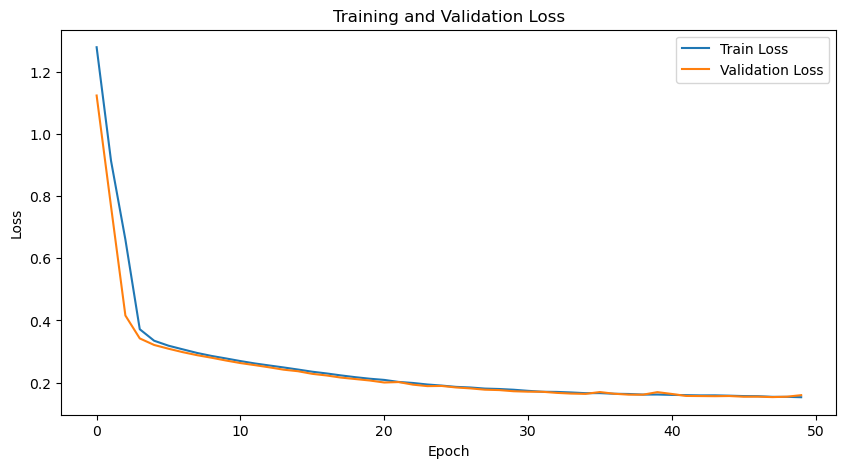

The function took 0.1018 seconds to execute.
The function took 0.0338 seconds to execute.
The function took 0.0342 seconds to execute.
Train Accuracy: 95.3342
Validation Accuracy: 95.1936
Test Accuracy: 95.3271

Training with: [32, 32]
Epoch 10/50, Train Loss: 0.1873, Val Loss: 0.1870
Epoch 20/50, Train Loss: 0.1490, Val Loss: 0.1517
Epoch 30/50, Train Loss: 0.1361, Val Loss: 0.1393
Epoch 40/50, Train Loss: 0.1278, Val Loss: 0.1289
Epoch 50/50, Train Loss: 0.1220, Val Loss: 0.1242
Training completed in 12.34 seconds.


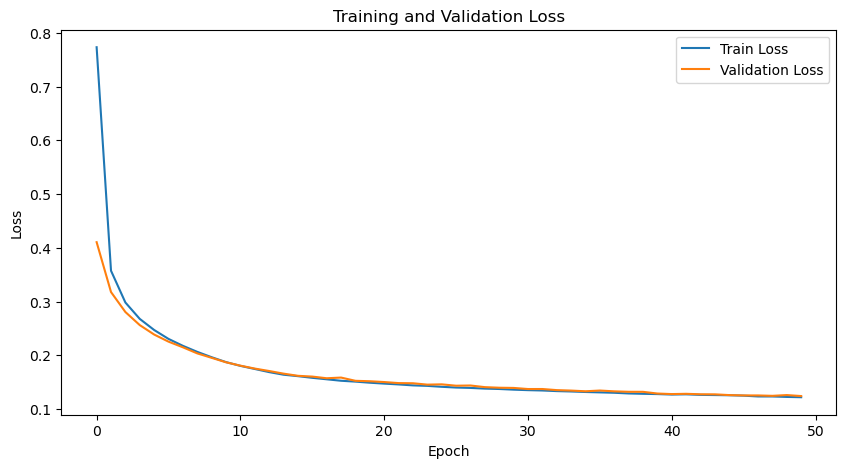

The function took 0.1445 seconds to execute.
The function took 0.0312 seconds to execute.
The function took 0.0306 seconds to execute.
Train Accuracy: 94.8594
Validation Accuracy: 94.8153
Test Accuracy: 94.5038

Training with: [16, 16, 16]
Epoch 10/50, Train Loss: 0.2219, Val Loss: 0.2147
Epoch 20/50, Train Loss: 0.1688, Val Loss: 0.1691
Epoch 30/50, Train Loss: 0.1380, Val Loss: 0.1402
Epoch 40/50, Train Loss: 0.1262, Val Loss: 0.1252
Epoch 50/50, Train Loss: 0.1158, Val Loss: 0.1189
Training completed in 12.95 seconds.


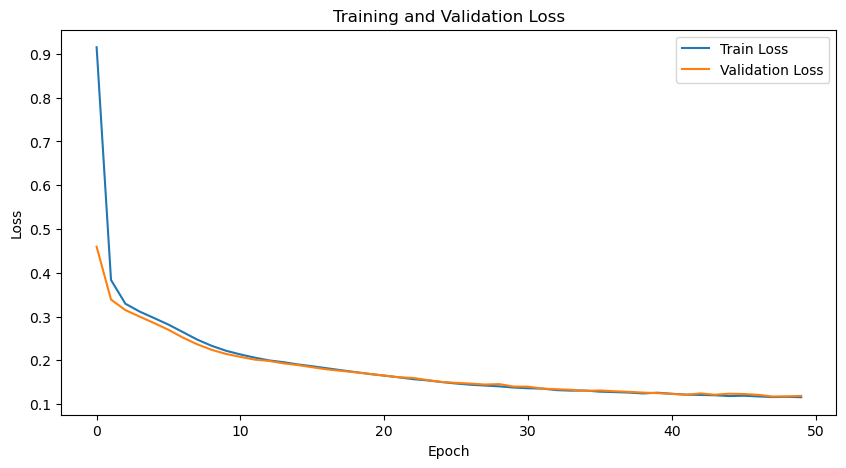

The function took 0.0948 seconds to execute.
The function took 0.0345 seconds to execute.
The function took 0.0314 seconds to execute.
Train Accuracy: 94.7778
Validation Accuracy: 94.6595
Test Accuracy: 94.1700

Training with: [32, 32, 32]
Epoch 10/50, Train Loss: 0.1802, Val Loss: 0.1803
Epoch 20/50, Train Loss: 0.1376, Val Loss: 0.1473
Epoch 30/50, Train Loss: 0.1242, Val Loss: 0.1252
Epoch 40/50, Train Loss: 0.1158, Val Loss: 0.1218
Epoch 50/50, Train Loss: 0.1116, Val Loss: 0.1104
Training completed in 13.25 seconds.


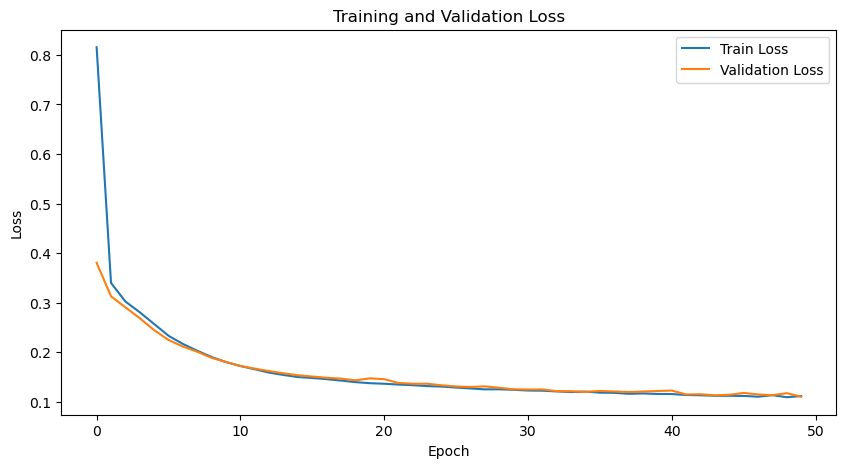

The function took 0.0946 seconds to execute.
The function took 0.0339 seconds to execute.
The function took 0.0312 seconds to execute.
Train Accuracy: 95.8089
Validation Accuracy: 95.5719
Test Accuracy: 95.5496

Training with: [32, 32, 32, 32, 32]
Epoch 10/50, Train Loss: 0.1668, Val Loss: 0.1593
Epoch 20/50, Train Loss: 0.1212, Val Loss: 0.1196
Epoch 30/50, Train Loss: 0.1092, Val Loss: 0.1054
Epoch 40/50, Train Loss: 0.1004, Val Loss: 0.0995
Epoch 50/50, Train Loss: 0.0966, Val Loss: 0.0951
Training completed in 15.84 seconds.


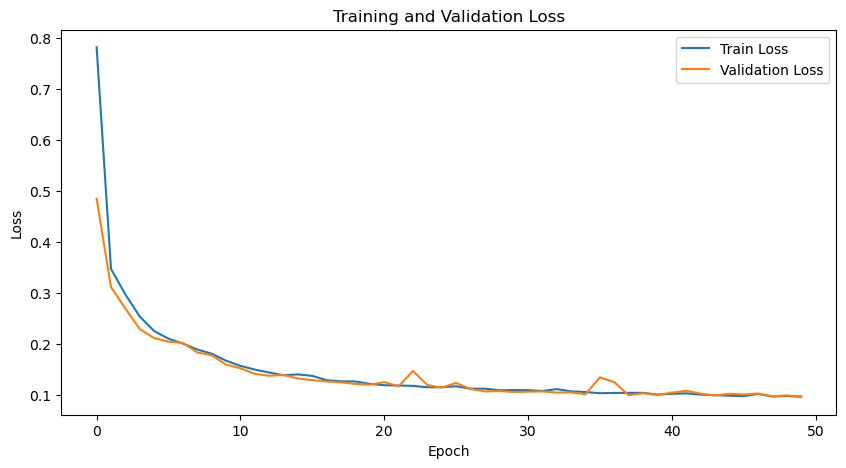

The function took 0.1034 seconds to execute.
The function took 0.0327 seconds to execute.
The function took 0.0396 seconds to execute.
Train Accuracy: 96.4988
Validation Accuracy: 96.5287
Test Accuracy: 96.5510

Training with: [8, 16, 8]
Epoch 10/50, Train Loss: 0.2646, Val Loss: 0.2545
Epoch 20/50, Train Loss: 0.1700, Val Loss: 0.1698
Epoch 30/50, Train Loss: 0.1507, Val Loss: 0.1521
Epoch 40/50, Train Loss: 0.1426, Val Loss: 0.1430
Epoch 50/50, Train Loss: 0.1374, Val Loss: 0.1374
Training completed in 13.44 seconds.


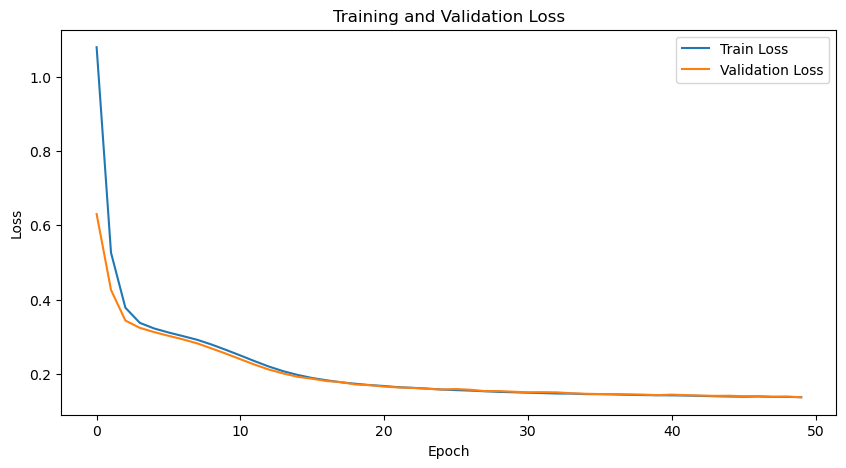

The function took 0.0934 seconds to execute.
The function took 0.0314 seconds to execute.
The function took 0.0332 seconds to execute.
Train Accuracy: 94.4960
Validation Accuracy: 94.4370
Test Accuracy: 94.1700

Training with: [8, 16, 16, 8]
Epoch 10/50, Train Loss: 0.2668, Val Loss: 0.2589
Epoch 20/50, Train Loss: 0.1860, Val Loss: 0.1887
Epoch 30/50, Train Loss: 0.1586, Val Loss: 0.1588
Epoch 40/50, Train Loss: 0.1392, Val Loss: 0.1424
Epoch 50/50, Train Loss: 0.1301, Val Loss: 0.1257
Training completed in 14.14 seconds.


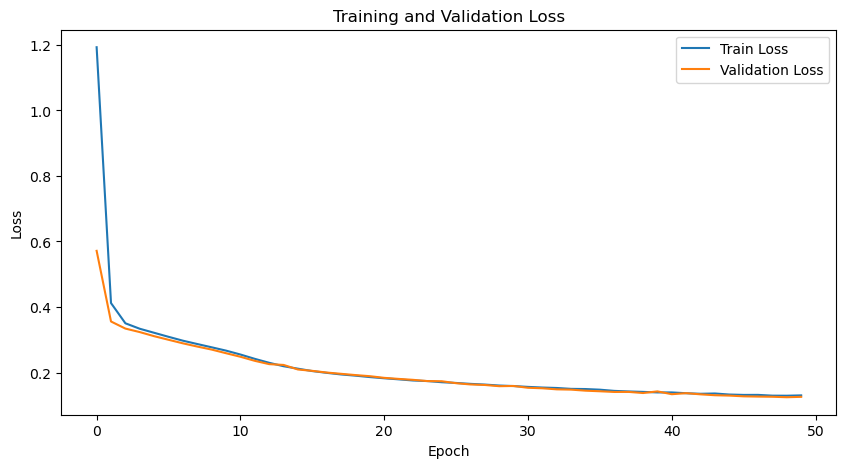

The function took 0.1239 seconds to execute.
The function took 0.0602 seconds to execute.
The function took 0.0458 seconds to execute.
Train Accuracy: 94.8743
Validation Accuracy: 94.8821
Test Accuracy: 94.5928

Training with: [16, 32, 32, 16]
Epoch 10/50, Train Loss: 0.1887, Val Loss: 0.1876
Epoch 20/50, Train Loss: 0.1392, Val Loss: 0.1472
Epoch 30/50, Train Loss: 0.1263, Val Loss: 0.1319
Epoch 40/50, Train Loss: 0.1206, Val Loss: 0.1223
Epoch 50/50, Train Loss: 0.1128, Val Loss: 0.1205
Training completed in 14.36 seconds.


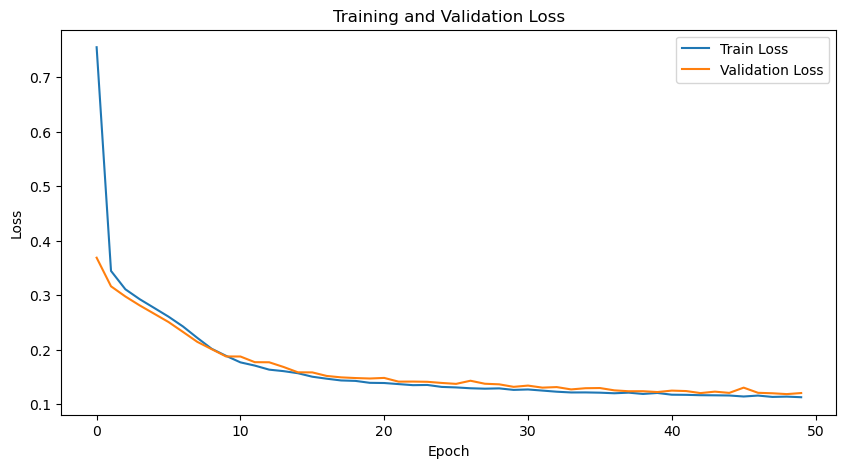

The function took 0.0970 seconds to execute.
The function took 0.0333 seconds to execute.
The function took 0.0371 seconds to execute.
Train Accuracy: 94.7037
Validation Accuracy: 94.7263
Test Accuracy: 94.3480

Training with: [8, 16, 32, 16, 8]
Epoch 10/50, Train Loss: 0.2164, Val Loss: 0.2085
Epoch 20/50, Train Loss: 0.1663, Val Loss: 0.1664
Epoch 30/50, Train Loss: 0.1436, Val Loss: 0.1443
Epoch 40/50, Train Loss: 0.1296, Val Loss: 0.1257
Epoch 50/50, Train Loss: 0.1191, Val Loss: 0.1174
Training completed in 18.16 seconds.


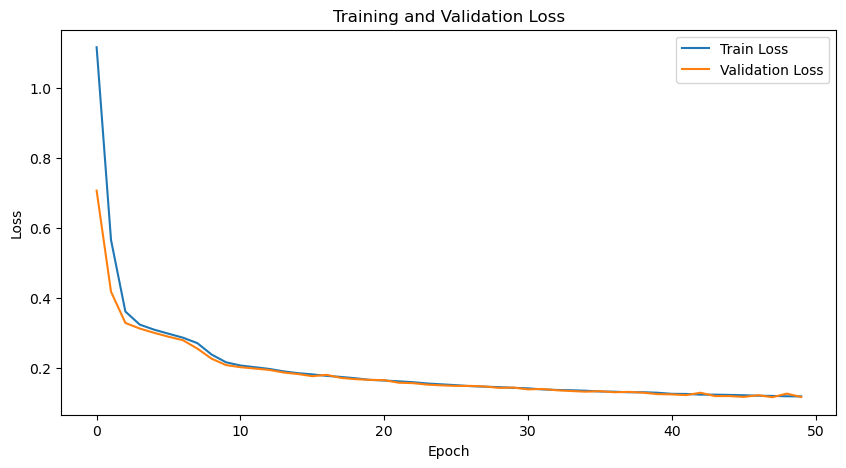

The function took 0.1293 seconds to execute.
The function took 0.0351 seconds to execute.
The function took 0.0395 seconds to execute.
Train Accuracy: 95.7422
Validation Accuracy: 95.6164
Test Accuracy: 95.8389

Training with: [2, 4, 8, 4]
Epoch 10/50, Train Loss: 0.3288, Val Loss: 0.3237
Epoch 20/50, Train Loss: 0.2917, Val Loss: 0.2902
Epoch 30/50, Train Loss: 0.2613, Val Loss: 0.2576
Epoch 40/50, Train Loss: 0.2453, Val Loss: 0.2415
Epoch 50/50, Train Loss: 0.2331, Val Loss: 0.2308
Training completed in 13.72 seconds.


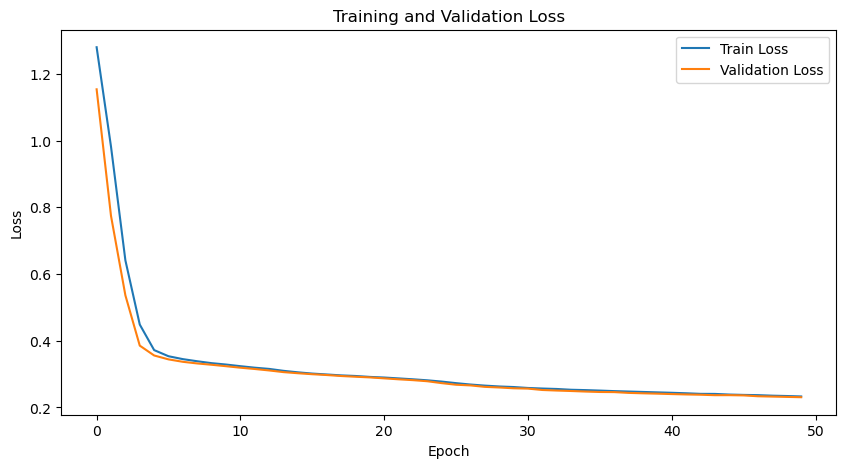

The function took 0.1199 seconds to execute.
The function took 0.0317 seconds to execute.
The function took 0.0317 seconds to execute.
Train Accuracy: 93.4204
Validation Accuracy: 93.4579
Test Accuracy: 93.1242

Training with: [16, 16, 32, 32, 16]
Epoch 10/50, Train Loss: 0.2076, Val Loss: 0.2037
Epoch 20/50, Train Loss: 0.1440, Val Loss: 0.1407
Epoch 30/50, Train Loss: 0.1191, Val Loss: 0.1177
Epoch 40/50, Train Loss: 0.1082, Val Loss: 0.1151
Epoch 50/50, Train Loss: 0.1014, Val Loss: 0.1024
Training completed in 15.91 seconds.


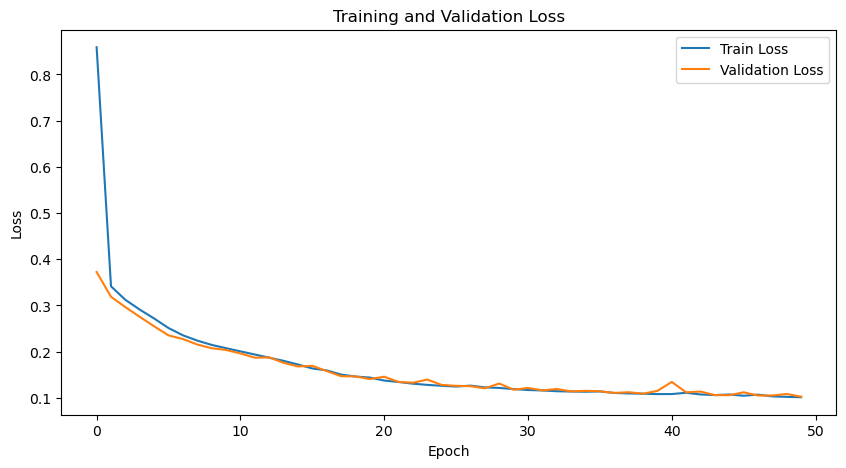

The function took 0.1206 seconds to execute.
The function took 0.0543 seconds to execute.
The function took 0.0403 seconds to execute.
Train Accuracy: 96.6916
Validation Accuracy: 96.7290
Test Accuracy: 96.7957


In [ ]:
architectures = [
    # — funnel nets —
    [16, 8],             # 2 layers
    [32, 16],            # 2 layers
    [32, 16, 8],         # 3 layers
    [32, 16, 8, 4],      # 4 layers
    [32, 16, 8, 4, 2],   # 5 layers
    # — uniform nets —
    [32, 32],
    [16, 16, 16],
    [32, 32, 32],
    [32, 32, 32, 32, 32],
    # — hourglass nets (expand then contract) —
    [8, 16, 8],
    [8, 16, 16, 8],
    [16, 32, 32, 16],
    [8, 16, 32, 16, 8],
    # — sparse nets —
    [2, 4, 8, 4],
    [16, 16, 32, 32, 16]
]

class MulticlassNN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MulticlassNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

results = []

best_architecture = None
best_val_acc = 0

# Try each architecture
for hidden_layers in architectures:
    print(f"\nTraining with: {hidden_layers}")
    model = MulticlassNN(input_size, hidden_layers, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )
    train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    # Finally print the results
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_architecture = hidden_layers

In [ ]:
print(f"Best architecture: {best_architecture}, Val Accuracy: {best_val_acc:.2f}%")

Best architecture: [16, 16, 32, 32, 16], Val Accuracy: 96.73%


### The impact of batch size
Use the best hyperparameter identified in the previous step and experiment with different
batch sizes.

In particular, use as batch size: {1, 32, 64, 128, 512}.

- Does the performance change? And why? Report both the validation and test results.
- How long does it take to train the models depending on the batch size? And why?


Training with batch size: 1
Epoch 10/50, Train Loss: 0.1410, Val Loss: 0.1410
Epoch 20/50, Train Loss: 0.1342, Val Loss: 0.1308
Epoch 30/50, Train Loss: 0.1424, Val Loss: 0.1315
Epoch 40/50, Train Loss: 0.1346, Val Loss: 0.1267
Epoch 50/50, Train Loss: 0.1325, Val Loss: 0.1197
Training completed in 532.90 seconds.


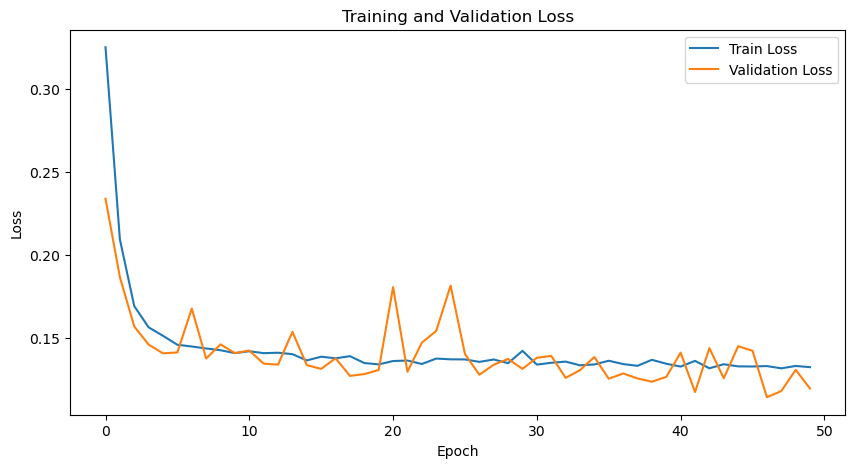

The function took 0.5657 seconds to execute.
The function took 0.5105 seconds to execute.
Validation Accuracy: 94.93%
Test Accuracy: 94.46%
Training Time: 532.98 seconds

Training with batch size: 32
Epoch 10/50, Train Loss: 0.1581, Val Loss: 0.1622
Epoch 20/50, Train Loss: 0.1359, Val Loss: 0.1351
Epoch 30/50, Train Loss: 0.1242, Val Loss: 0.1214
Epoch 40/50, Train Loss: 0.1147, Val Loss: 0.1161
Epoch 50/50, Train Loss: 0.1053, Val Loss: 0.1031
Training completed in 23.06 seconds.


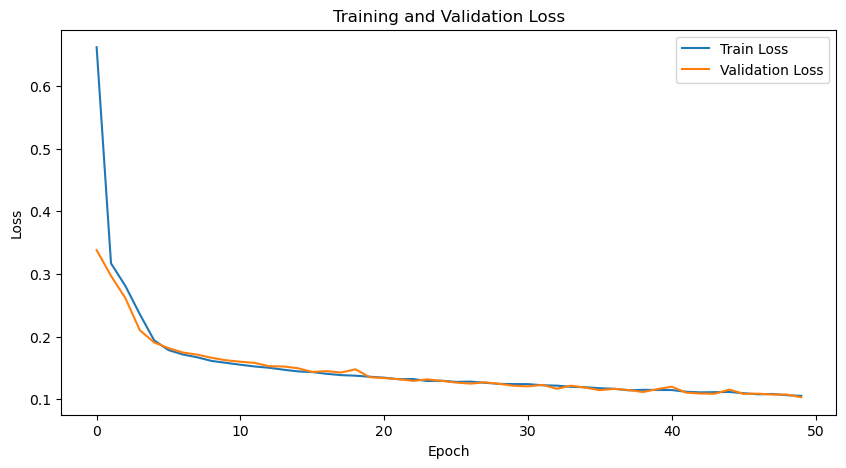

The function took 0.0528 seconds to execute.
The function took 0.0632 seconds to execute.
Validation Accuracy: 96.37%
Test Accuracy: 96.68%
Training Time: 23.15 seconds

Training with batch size: 64
Epoch 10/50, Train Loss: 0.1749, Val Loss: 0.1705
Epoch 20/50, Train Loss: 0.1312, Val Loss: 0.1313
Epoch 30/50, Train Loss: 0.1165, Val Loss: 0.1199
Epoch 40/50, Train Loss: 0.1098, Val Loss: 0.1156
Epoch 50/50, Train Loss: 0.1043, Val Loss: 0.1032
Training completed in 14.90 seconds.


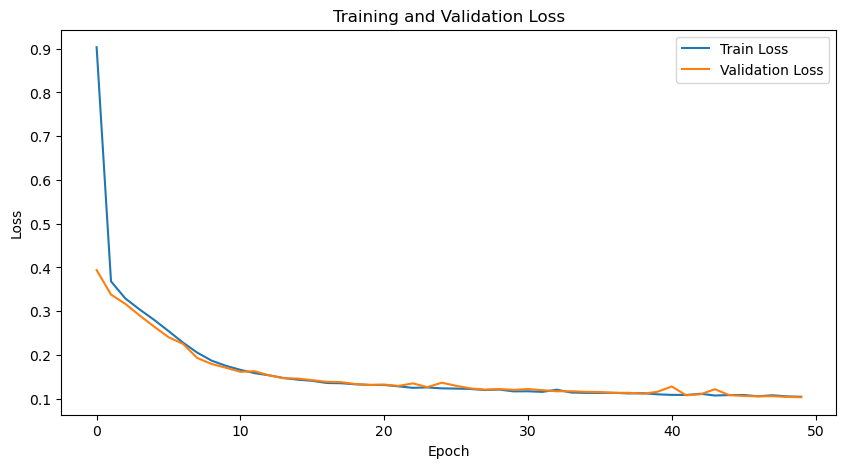

The function took 0.0432 seconds to execute.
The function took 0.0444 seconds to execute.
Validation Accuracy: 96.13%
Test Accuracy: 96.31%
Training Time: 15.02 seconds

Training with batch size: 128
Epoch 10/50, Train Loss: 0.2124, Val Loss: 0.1998
Epoch 20/50, Train Loss: 0.1436, Val Loss: 0.1436
Epoch 30/50, Train Loss: 0.1347, Val Loss: 0.1410
Epoch 40/50, Train Loss: 0.1202, Val Loss: 0.1194
Epoch 50/50, Train Loss: 0.1112, Val Loss: 0.1142
Training completed in 12.58 seconds.


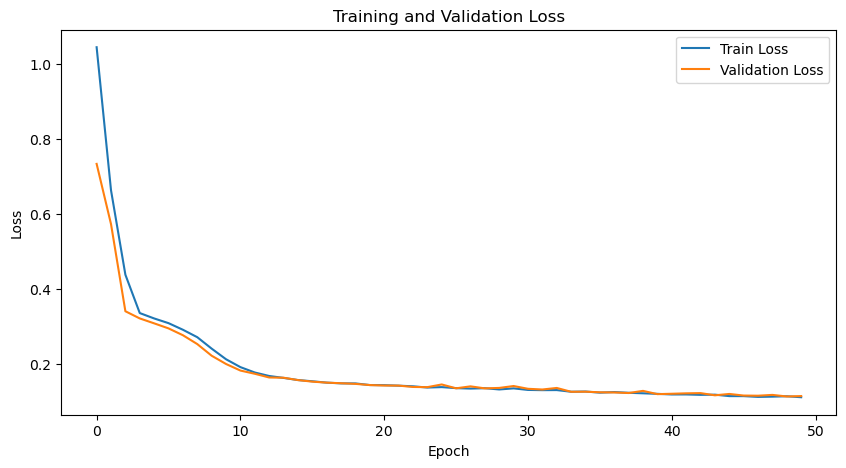

The function took 0.0403 seconds to execute.
The function took 0.0383 seconds to execute.
Validation Accuracy: 96.55%
Test Accuracy: 96.40%
Training Time: 12.68 seconds

Training with batch size: 512
Epoch 10/50, Train Loss: 0.3425, Val Loss: 0.3320
Epoch 20/50, Train Loss: 0.2753, Val Loss: 0.2687
Epoch 30/50, Train Loss: 0.1899, Val Loss: 0.1881
Epoch 40/50, Train Loss: 0.1501, Val Loss: 0.1544
Epoch 50/50, Train Loss: 0.1349, Val Loss: 0.1404
Training completed in 8.60 seconds.


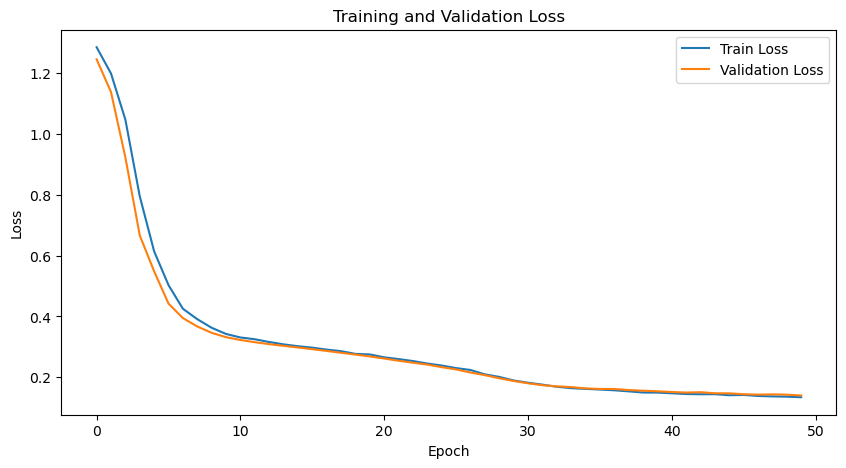

The function took 0.0351 seconds to execute.
The function took 0.0323 seconds to execute.
Validation Accuracy: 94.50%
Test Accuracy: 94.21%
Training Time: 8.70 seconds


In [ ]:
batch_sizes = [1, 32, 64, 128, 512]
batch_results = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # Recreate dataloaders with new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize new model with best architecture
    model = MulticlassNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    # Train the model and measure time
    start_train_time = time.time()
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )
    train_duration = time.time() - start_train_time

    # Evaluate performance
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {train_duration:.2f} seconds")

    # Store the results
    batch_results.append({
        'batch_size': batch_size,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_time_sec': train_duration
    })

In [ ]:
# Summarize results
print("--- Summary of Batch Size Impact ---")
for result in batch_results:
    print(f"Batch Size: {result['batch_size']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%, "
          f"Training Time: {result['train_time_sec']:.2f} sec")

best_batch = max(batch_results, key=lambda x: x['val_accuracy'])

print(f"\nBest batch size: {best_batch['batch_size']}, Val Accuracy: {best_batch['val_accuracy']:.2f}%, Test Accuracy: {best_batch['test_accuracy']:.2f}%")
best_batchsize = best_batch['batch_size']

train_loader = DataLoader(train_dataset, batch_size=best_batchsize, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=best_batchsize)
test_loader = DataLoader(test_dataset, batch_size=best_batchsize)

--- Summary of Batch Size Impact ---
Batch Size: 1, Validation Accuracy: 94.93%, Test Accuracy: 94.46%, Training Time: 532.98 sec
Batch Size: 32, Validation Accuracy: 96.37%, Test Accuracy: 96.68%, Training Time: 23.15 sec
Batch Size: 64, Validation Accuracy: 96.13%, Test Accuracy: 96.31%, Training Time: 15.02 sec
Batch Size: 128, Validation Accuracy: 96.55%, Test Accuracy: 96.40%, Training Time: 12.68 sec
Batch Size: 512, Validation Accuracy: 94.50%, Test Accuracy: 94.21%, Training Time: 8.70 sec

Best batch size: 128, Val Accuracy: 96.55%, Test Accuracy: 96.40%


### The impact of the Activation Function
Use the best hyperparameter identified in the previous steps and experiment with different
activation functions.

In particular, use as activation functions: Linear, Sigmoid, ReLU.

- Does the performance change? Why does it change? Report both the validation and the
test results.
- Explain why and how the different activation functions affect performance in this archi-
tecture


Using Activation Function: Linear
Epoch 10/50, Train Loss: 0.3163, Val Loss: 0.3097
Epoch 20/50, Train Loss: 0.3058, Val Loss: 0.2944
Epoch 30/50, Train Loss: 0.2982, Val Loss: 0.2910
Epoch 40/50, Train Loss: 0.2944, Val Loss: 0.2923
Epoch 50/50, Train Loss: 0.2967, Val Loss: 0.2858
Training completed in 12.20 seconds.


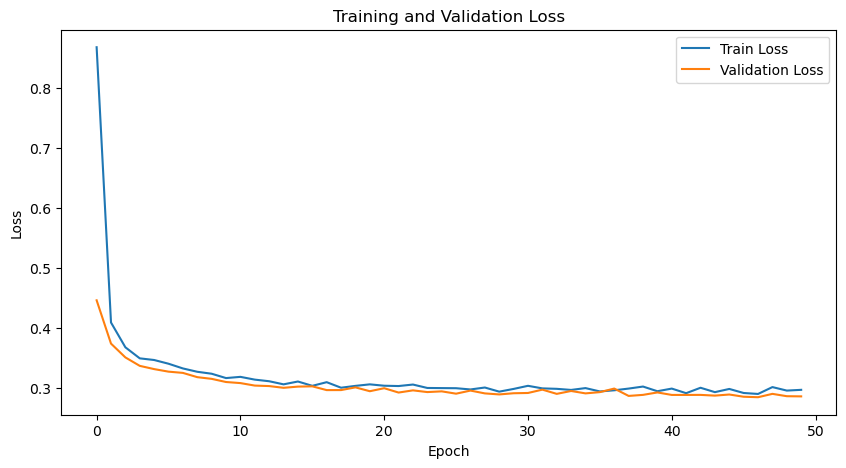

The function took 0.0706 seconds to execute.
The function took 0.0772 seconds to execute.
Validation Accuracy: 89.50%
Test Accuracy: 88.94%

Using Activation Function: Sigmoid
Epoch 10/50, Train Loss: 0.7477, Val Loss: 0.7441
Epoch 20/50, Train Loss: 0.7297, Val Loss: 0.7168
Epoch 30/50, Train Loss: 0.4043, Val Loss: 0.3930
Epoch 40/50, Train Loss: 0.3995, Val Loss: 0.3913
Epoch 50/50, Train Loss: 0.3986, Val Loss: 0.3905
Training completed in 12.80 seconds.


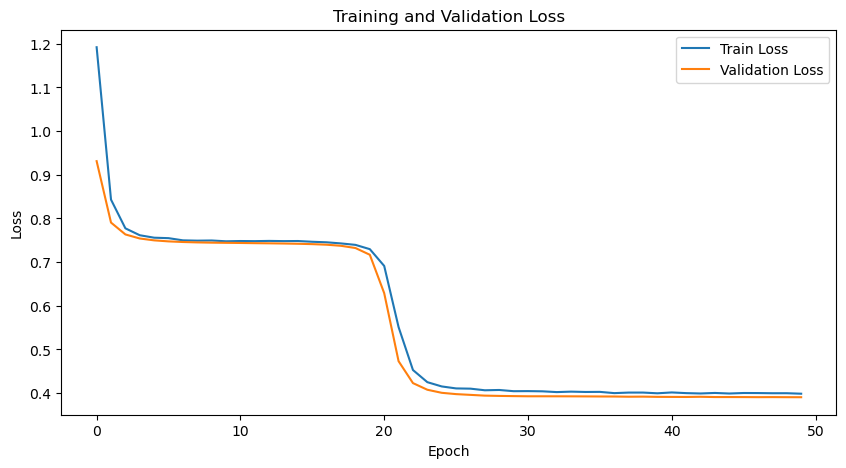

The function took 0.0793 seconds to execute.
The function took 0.0582 seconds to execute.
Validation Accuracy: 90.21%
Test Accuracy: 89.65%

Using Activation Function: ReLU
Epoch 10/50, Train Loss: 0.2035, Val Loss: 0.1879
Epoch 20/50, Train Loss: 0.1420, Val Loss: 0.1400
Epoch 30/50, Train Loss: 0.1174, Val Loss: 0.1173
Epoch 40/50, Train Loss: 0.1071, Val Loss: 0.1150
Epoch 50/50, Train Loss: 0.1005, Val Loss: 0.0993
Training completed in 13.25 seconds.


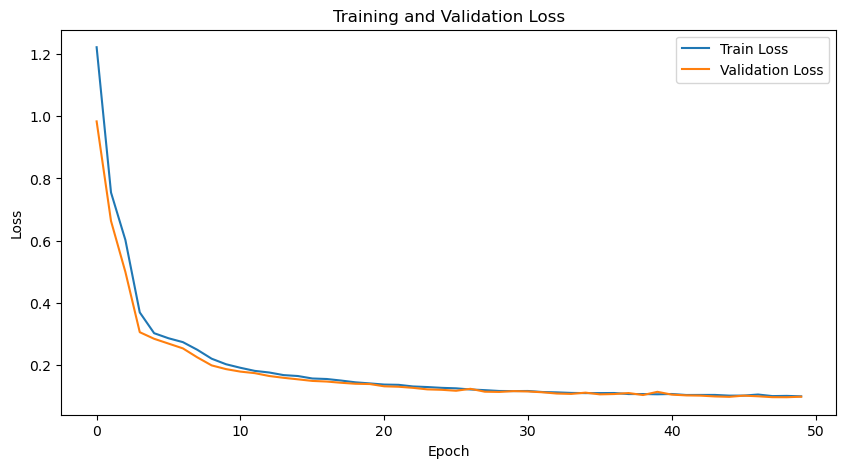

The function took 0.0412 seconds to execute.
The function took 0.0440 seconds to execute.
Validation Accuracy: 96.19%
Test Accuracy: 96.02%


In [ ]:
activations = {
    'Linear': nn.Identity(),
    'Sigmoid': nn.Sigmoid(),
    'ReLU': nn.ReLU()
}

class ActivationsNN(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn, output_size):
        super(ActivationsNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(activation_fn)  #selected activation
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

activation_results = []

for name, activation_fn in activations.items():
    print(f"\nUsing Activation Function: {name}")

    model = ActivationsNN(input_size, best_architecture, activation_fn, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )

    # Evaluate performance
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Store the results
    activation_results.append({
            'activation': name,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy
        })



In [ ]:
# Summarize results
print("\n--- Summary of Activation Function Impact ---")
for result in activation_results:
    print(f"Activation: {result['activation']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%")

best_actv = max(activation_results, key=lambda x: x['val_accuracy'])

print(f"\nBest Activation Function: {best_actv['activation']}, Val Accuracy: {best_actv['val_accuracy']:.2f}%, Test Accuracy: {best_actv['test_accuracy']:.2f}%")
best_actvfunc = best_actv['activation']


--- Summary of Activation Function Impact ---
Activation: Linear, Validation Accuracy: 89.50%, Test Accuracy: 88.94%
Activation: Sigmoid, Validation Accuracy: 90.21%, Test Accuracy: 89.65%
Activation: ReLU, Validation Accuracy: 96.19%, Test Accuracy: 96.02%

Best Activation Function: ReLU, Val Accuracy: 96.19%, Test Accuracy: 96.02%


### The impact of the Optimizer
Finally, evaluate here how the optimizers affect the classification performance, training time
and loss trend.

The evaluated optimizers are:
- Stochastic Gradient Descent (SGD)
- SGD with Momentum (0.1, 0.5, 0.9)
- AdamW.


Training with Optimizer: SGD
Epoch 10/50, Train Loss: 0.7184, Val Loss: 0.6878
Epoch 20/50, Train Loss: 0.4281, Val Loss: 0.4109
Epoch 30/50, Train Loss: 0.4087, Val Loss: 0.3968
Epoch 40/50, Train Loss: 0.4037, Val Loss: 0.3914
Epoch 50/50, Train Loss: 0.3948, Val Loss: 0.3858
Training completed in 9.77 seconds.


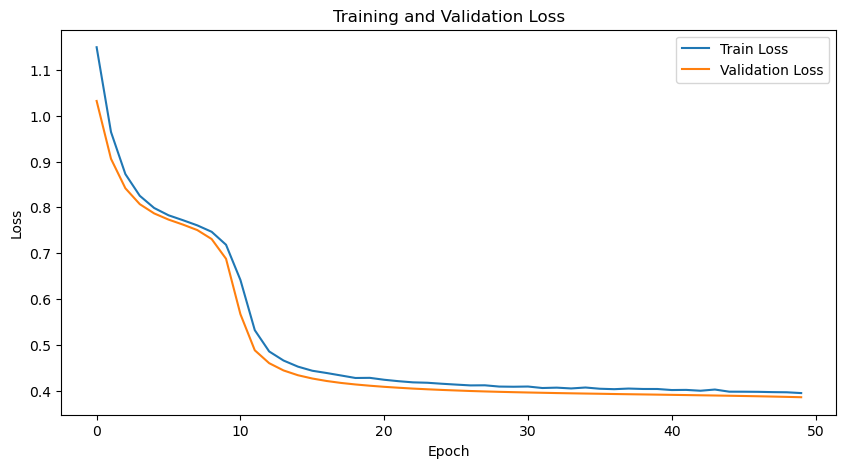

The function took 0.0368 seconds to execute.
The function took 0.0369 seconds to execute.
Validation Accuracy: 90.05%
Test Accuracy: 89.54%
Training Time: 9.88 seconds

Training with Optimizer: SGD+Momentum(0.1)
Epoch 10/50, Train Loss: 0.7463, Val Loss: 0.7402
Epoch 20/50, Train Loss: 0.5485, Val Loss: 0.5123
Epoch 30/50, Train Loss: 0.3342, Val Loss: 0.3255
Epoch 40/50, Train Loss: 0.2955, Val Loss: 0.2845
Epoch 50/50, Train Loss: 0.2744, Val Loss: 0.2622
Training completed in 10.40 seconds.


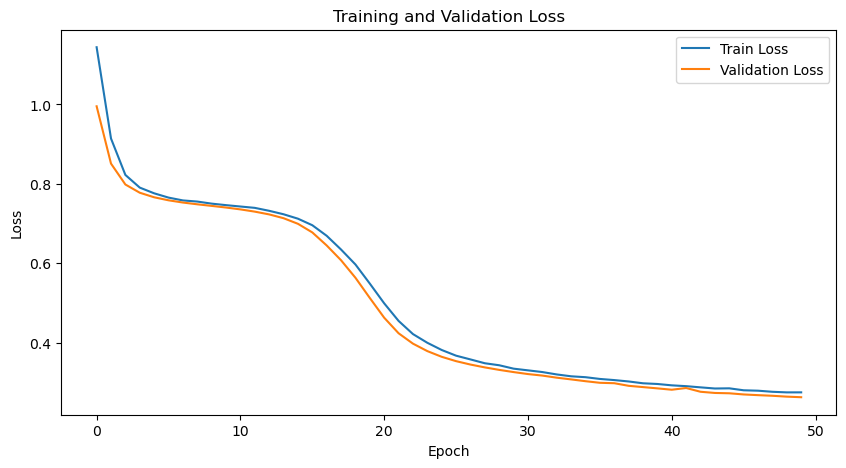

The function took 0.0422 seconds to execute.
The function took 0.0391 seconds to execute.
Validation Accuracy: 94.24%
Test Accuracy: 94.06%
Training Time: 10.50 seconds

Training with Optimizer: SGD+Momentum(0.5)
Epoch 10/50, Train Loss: 0.7498, Val Loss: 0.7434
Epoch 20/50, Train Loss: 0.3875, Val Loss: 0.3693
Epoch 30/50, Train Loss: 0.2932, Val Loss: 0.2801
Epoch 40/50, Train Loss: 0.2607, Val Loss: 0.2492
Epoch 50/50, Train Loss: 0.2484, Val Loss: 0.2367
Training completed in 10.24 seconds.


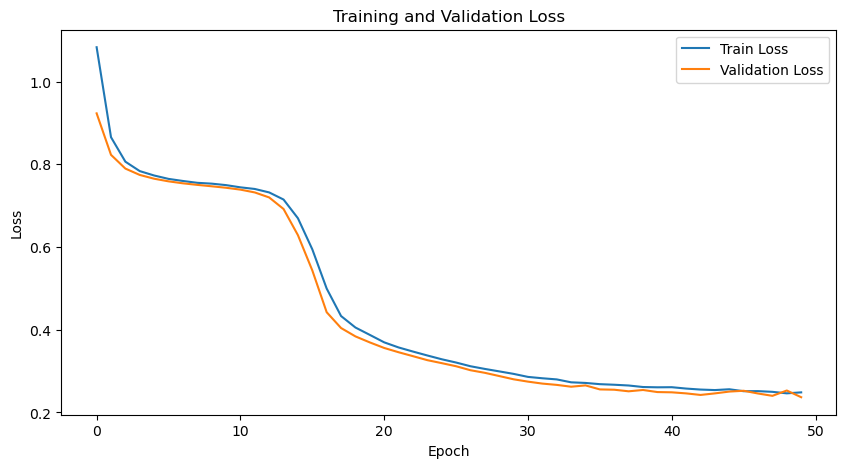

The function took 0.0391 seconds to execute.
The function took 0.0432 seconds to execute.
Validation Accuracy: 94.88%
Test Accuracy: 94.75%
Training Time: 10.33 seconds

Training with Optimizer: SGD+Momentum(0.9)
Epoch 10/50, Train Loss: 0.2817, Val Loss: 0.2687
Epoch 20/50, Train Loss: 0.1864, Val Loss: 0.1853
Epoch 30/50, Train Loss: 0.1754, Val Loss: 0.1820
Epoch 40/50, Train Loss: 0.1420, Val Loss: 0.1392
Epoch 50/50, Train Loss: 0.1307, Val Loss: 0.1305
Training completed in 10.12 seconds.


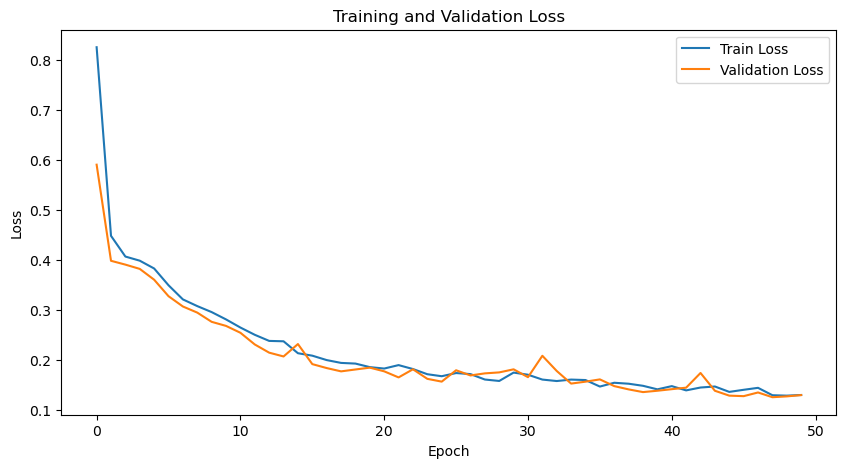

The function took 0.0358 seconds to execute.
The function took 0.0374 seconds to execute.
Validation Accuracy: 95.53%
Test Accuracy: 95.51%
Training Time: 10.22 seconds

Training with Optimizer: AdamW
Epoch 10/50, Train Loss: 0.2191, Val Loss: 0.2016
Epoch 20/50, Train Loss: 0.1428, Val Loss: 0.1405
Epoch 30/50, Train Loss: 0.1181, Val Loss: 0.1223
Epoch 40/50, Train Loss: 0.1077, Val Loss: 0.1068
Epoch 50/50, Train Loss: 0.1001, Val Loss: 0.1114
Training completed in 12.08 seconds.


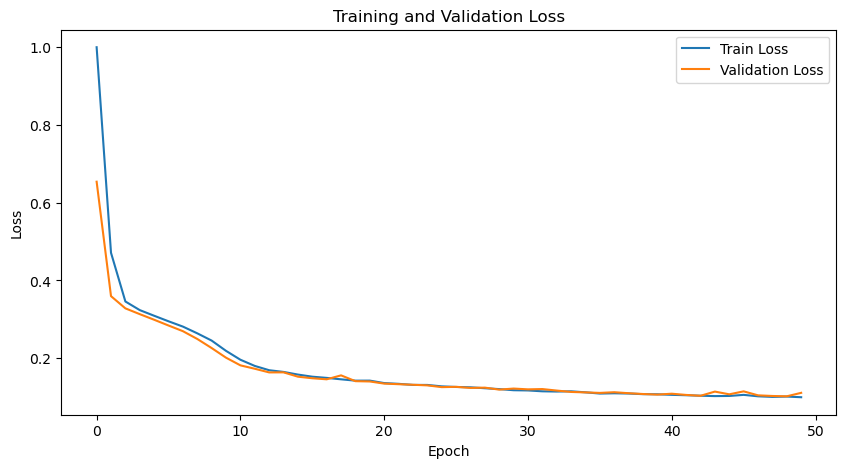

The function took 0.0492 seconds to execute.
The function took 0.0458 seconds to execute.
Validation Accuracy: 95.71%
Test Accuracy: 95.79%
Training Time: 12.17 seconds


In [ ]:
optim_configs = [
    {'name': 'SGD', 'opt': lambda params: optim.SGD(params, lr=0.01)},
    {'name': 'SGD+Momentum(0.1)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.1)},
    {'name': 'SGD+Momentum(0.5)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.5)},
    {'name': 'SGD+Momentum(0.9)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.9)},
    {'name': 'AdamW', 'opt': lambda params: optim.AdamW(params, lr=0.0005)}
]

optimizer_results = []

for config in optim_configs:
    print(f"\nTraining with Optimizer: {config['name']}")

    model = MulticlassNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = config['opt'](model.parameters())

    start_train_time = time.time()
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )
    train_time = time.time() - start_train_time

    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {train_time:.2f} seconds")

    optimizer_results.append({
        'optimizer': config['name'],
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_time_sec': train_time,
        'train_losses': train_losses,
        'val_losses': val_losses
    })


In [ ]:
# Summarize results
print("\n--- Summary of Optimizer Function Impact ---")
for result in optimizer_results:
    print(f"Optimizer: {result['optimizer']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%")

best_optm = max(optimizer_results, key=lambda x: x['val_accuracy'])

print(f"\nBest Activation Function: {best_optm['optimizer']}, Val Accuracy: {best_optm['val_accuracy']:.2f}%, Test Accuracy: {best_optm['test_accuracy']:.2f}%")
best_optmimizer = best_optm['optimizer']


--- Summary of Optimizer Function Impact ---
Optimizer: SGD, Validation Accuracy: 90.05%, Test Accuracy: 89.54%
Optimizer: SGD+Momentum(0.1), Validation Accuracy: 94.24%, Test Accuracy: 94.06%
Optimizer: SGD+Momentum(0.5), Validation Accuracy: 94.88%, Test Accuracy: 94.75%
Optimizer: SGD+Momentum(0.9), Validation Accuracy: 95.53%, Test Accuracy: 95.51%
Optimizer: AdamW, Validation Accuracy: 95.71%, Test Accuracy: 95.79%

Best Activation Function: AdamW, Val Accuracy: 95.71%, Test Accuracy: 95.79%


## Task 5: Overfitting and Regularization

| **Hyperparameter**         | **Value**                      |
|----------------------------|--------------------------------|
| Layers                     | 6                              |
| Neurons per Layer          | {256, 128, 64, 32, 16}        |
| Activation                 | ReLU                           |
| Weight Initialization      | Default                        |
| Batch Size                 | 128                            |
| Loss Function              | Cross-Entropy                  |
| Optimizer                  | AdamW                          |
| Learning Rate              | 0.0005                         |
| Epochs & Early Stopping    | 50                             |
| Regularization             | None                           |


NOTICE: Each # Neurons per Layer describes how many neurons must be present in each
layer. For example: 1st layer 256, 2nd layer 128 etc.
- What do the losses look like? Is the model overfitting?

### Without Regularization

Epoch 10/50, Train Loss: 0.1413, Val Loss: 0.1327
Epoch 20/50, Train Loss: 0.1082, Val Loss: 0.1053
Epoch 30/50, Train Loss: 0.0976, Val Loss: 0.0977
Epoch 40/50, Train Loss: 0.0908, Val Loss: 0.0934
Epoch 50/50, Train Loss: 0.0902, Val Loss: 0.0961
Training completed in 15.75 seconds.


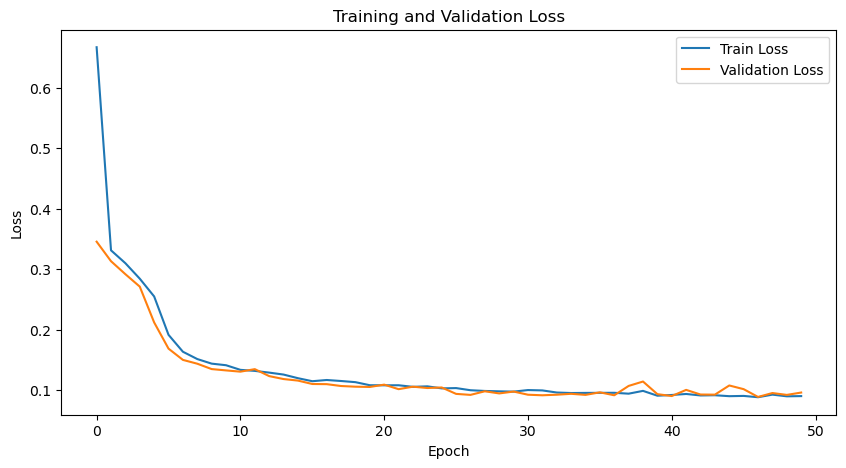

The function took 0.2436 seconds to execute.
The function took 0.0474 seconds to execute.
The function took 0.0476 seconds to execute.
Train Accuracy: 96.52%
Validation Accuracy: 95.71%
Test Accuracy: 96.13%


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

class MulticlassNN2(nn.Module):
    def __init__(self, input_size, output_size):
        super(MulticlassNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x

model = MulticlassNN2(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

trained_model, train_losses, val_losses = training_loop_with_minibatch(
    model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
)

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracyt, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

### Dropout techinque
- What impact do the different normalization techniques have on validation and testing
performance?

Epoch 10/50, Train Loss: 0.2268, Val Loss: 0.1766
Epoch 20/50, Train Loss: 0.1774, Val Loss: 0.1477
Epoch 30/50, Train Loss: 0.1671, Val Loss: 0.1411
Epoch 40/50, Train Loss: 0.1539, Val Loss: 0.1383
Epoch 50/50, Train Loss: 0.1503, Val Loss: 0.1334
Training completed in 16.57 seconds.


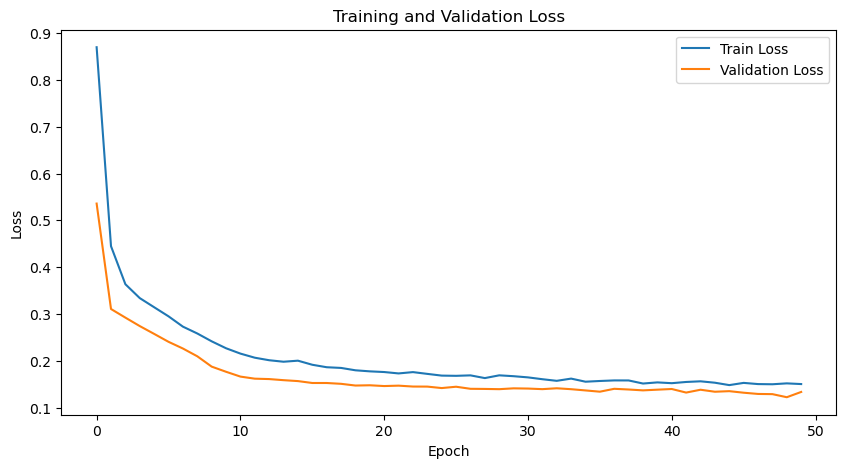

The function took 0.1797 seconds to execute.
The function took 0.0531 seconds to execute.
The function took 0.0477 seconds to execute.
Train Accuracy: 94.55%
Validation Accuracy: 95.71%
Test Accuracy: 94.24%


In [ ]:
#4.5 (Normalization techniques (dropout))

class MulticlassDropoutNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MulticlassDropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x


model = MulticlassDropoutNN(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

trained_model, train_losses, val_losses = training_loop_with_minibatch(
    model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
)

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracyt, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

### Batch Normalization techinque
- What impact do the different normalization techniques have on validation and testing
performance?

Epoch 10/50, Train Loss: 0.1975, Val Loss: 0.1690
Epoch 20/50, Train Loss: 0.1667, Val Loss: 0.1433
Epoch 30/50, Train Loss: 0.1519, Val Loss: 0.1384
Epoch 40/50, Train Loss: 0.1485, Val Loss: 0.1310
Epoch 50/50, Train Loss: 0.1427, Val Loss: 0.1453
Training completed in 20.23 seconds.


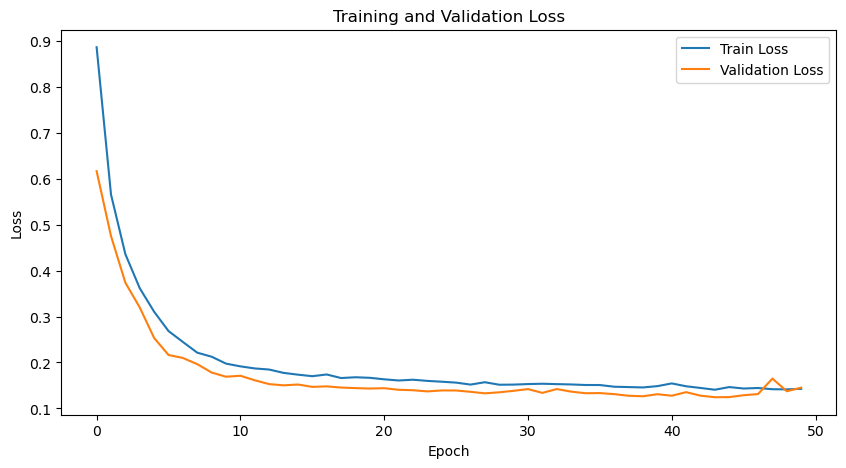

The function took 0.1466 seconds to execute.
The function took 0.0525 seconds to execute.
The function took 0.0474 seconds to execute.
Train Accuracy: 95.02%
Validation Accuracy: 95.71%
Test Accuracy: 94.77%


In [ ]:
#4.5 (Normalization techniques (Batch))
class MulticlassNormalizedNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MulticlassNormalizedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch Norm after fc1
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)   # Batch Norm after fc3
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.bn5 = nn.BatchNorm1d(16)   # Batch Norm after fc5
        self.fc6 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.relu(self.fc4(x))
        x = self.relu(self.bn5(self.fc5(x)))
        x = self.fc6(x)
        return x


model = MulticlassNormalizedNN(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

trained_model, train_losses, val_losses = training_loop_with_minibatch(
    model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
)

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracyt, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

### Weight Decay in AdamW

Training with weight_decay = 0.0
Epoch 10/50, Train Loss: 0.1955, Val Loss: 0.1781
Epoch 20/50, Train Loss: 0.1672, Val Loss: 0.1484
Epoch 30/50, Train Loss: 0.1573, Val Loss: 0.1389
Epoch 40/50, Train Loss: 0.1464, Val Loss: 0.1297
Epoch 50/50, Train Loss: 0.1408, Val Loss: 0.1234
Training completed in 18.86 seconds.


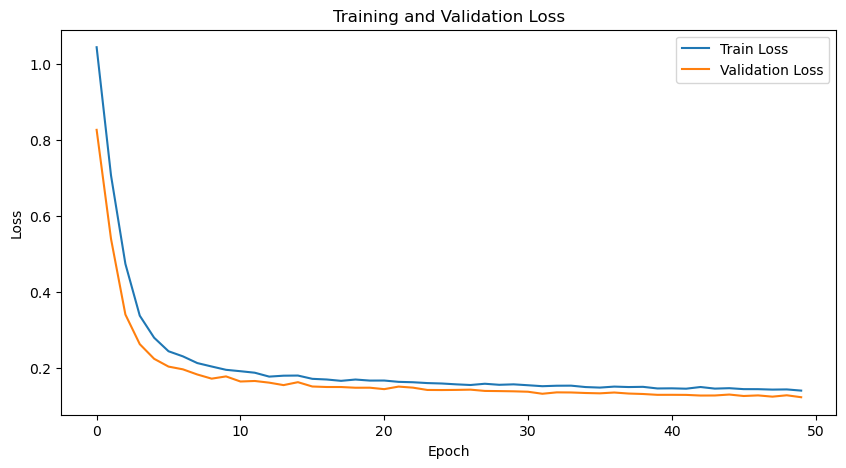

The function took 0.1390 seconds to execute.
The function took 0.0483 seconds to execute.
The function took 0.0616 seconds to execute.
Train Accuracy: 94.58%
Validation Accuracy: 94.41%
Test Accuracy: 94.26%
--------------------------------------------------
Training with weight_decay = 0.01
Epoch 10/50, Train Loss: 0.1930, Val Loss: 0.1688
Epoch 20/50, Train Loss: 0.1655, Val Loss: 0.1447
Epoch 30/50, Train Loss: 0.1543, Val Loss: 0.1391
Epoch 40/50, Train Loss: 0.1475, Val Loss: 0.1301
Epoch 50/50, Train Loss: 0.1442, Val Loss: 0.1325
Training completed in 18.69 seconds.


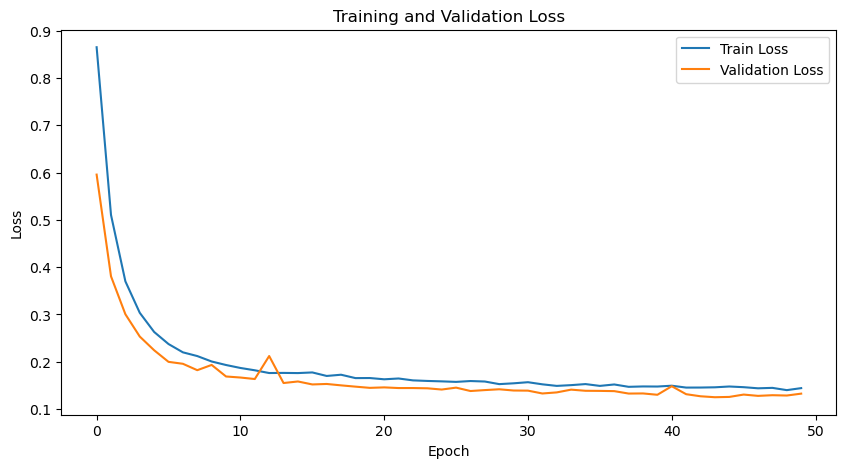

The function took 0.1403 seconds to execute.
The function took 0.0473 seconds to execute.
The function took 0.0588 seconds to execute.
Train Accuracy: 94.45%
Validation Accuracy: 94.30%
Test Accuracy: 94.21%
--------------------------------------------------
Training with weight_decay = 0.02
Epoch 10/50, Train Loss: 0.2000, Val Loss: 0.1708
Epoch 20/50, Train Loss: 0.1669, Val Loss: 0.1447
Epoch 30/50, Train Loss: 0.1519, Val Loss: 0.1307
Epoch 40/50, Train Loss: 0.1482, Val Loss: 0.1284
Epoch 50/50, Train Loss: 0.1442, Val Loss: 0.1238
Training completed in 18.36 seconds.


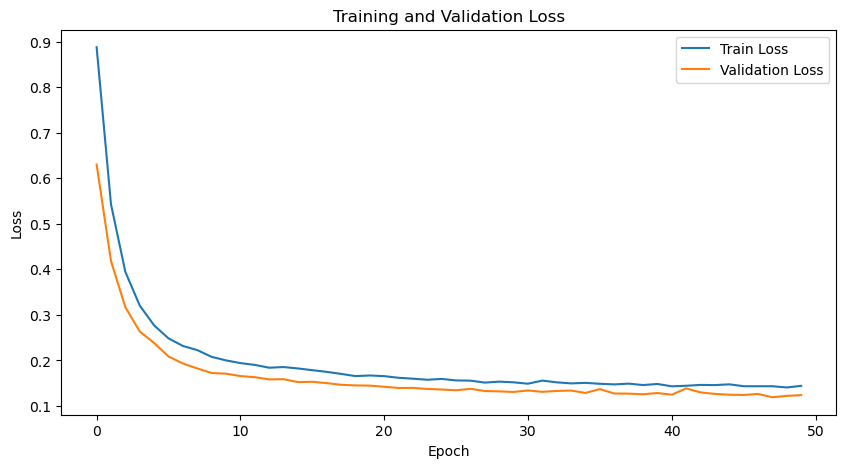

The function took 0.1386 seconds to execute.
The function took 0.0482 seconds to execute.
The function took 0.0486 seconds to execute.
Train Accuracy: 94.49%
Validation Accuracy: 94.37%
Test Accuracy: 94.21%
--------------------------------------------------
Training with weight_decay = 0.1
Epoch 10/50, Train Loss: 0.2068, Val Loss: 0.1771
Epoch 20/50, Train Loss: 0.1676, Val Loss: 0.1486
Epoch 30/50, Train Loss: 0.1544, Val Loss: 0.1364
Epoch 40/50, Train Loss: 0.1489, Val Loss: 0.1333
Epoch 50/50, Train Loss: 0.1461, Val Loss: 0.1309
Training completed in 18.66 seconds.


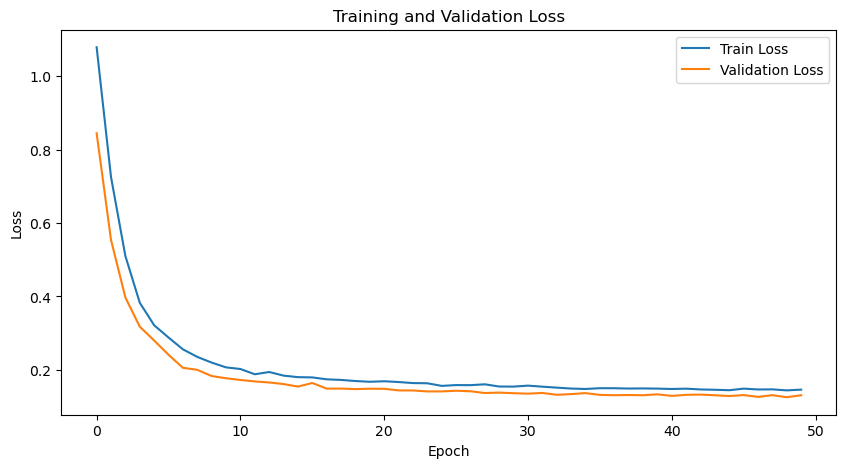

The function took 0.1357 seconds to execute.
The function took 0.0361 seconds to execute.
The function took 0.0360 seconds to execute.
Train Accuracy: 94.40%
Validation Accuracy: 94.24%
Test Accuracy: 94.17%
--------------------------------------------------


In [ ]:
weight_decay_values = [0.0, 0.01, 0.02, 0.1]

results = []  # To store results for each weight decay value

for weight_decay in weight_decay_values:
    print(f"Training with weight_decay = {weight_decay}")

    # Initialize the model, criterion, and optimizer
    model = MulticlassNormalizedNN(input_size, output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=weight_decay)

    # Train the model
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch=50, patience=20
    )

    # Test the model
    train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    # Store results
    results.append({
        'weight_decay': weight_decay,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    })

    # Print results for this weight decay value
    print(f"Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print("-" * 50)


In [ ]:
# Summarize the results
print("Summary of Results:")
for res in results:
    print(f"Weight Decay: {res['weight_decay']}, "
          f"Train Acc: {res['train_accuracy']:.2f}%, "
          f"Val Acc: {res['val_accuracy']:.2f}%, "
          f"Test Acc: {res['test_accuracy']:.2f}%")

best_weight_decay = max(results, key=lambda x: x['val_accuracy'])

print(f"\nBest weight decay: {best_weight_decay['weight_decay']}, Train Accuracy: {best_weight_decay['train_accuracy']:.2f}%, Val Accuracy: {best_weight_decay['val_accuracy']:.2f}%, Test Accuracy: {best_weight_decay['test_accuracy']:.2f}%")

Summary of Results:
Weight Decay: 0.0, Train Acc: 94.58%, Val Acc: 94.41%, Test Acc: 94.26%
Weight Decay: 0.01, Train Acc: 94.45%, Val Acc: 94.30%, Test Acc: 94.21%
Weight Decay: 0.02, Train Acc: 94.49%, Val Acc: 94.37%, Test Acc: 94.21%
Weight Decay: 0.1, Train Acc: 94.40%, Val Acc: 94.24%, Test Acc: 94.17%

Best weight decay: 0.0, Train Accuracy: 94.58%, Val Accuracy: 94.41%, Test Accuracy: 94.26%
